# Project Notebook 
Keith McNamara

## Project Outline
The goal of the project is to conduct a comprehensive analysis on the Iris Flower dataset. Each variable within the dataset will be systematically classified in this notebook. For numerical variables, appropriate summary statistics such as mean, median, and standard deviation will be calculated. Categorical variables will be summarized using counts and percentages. Suitable plots for visual representation of these variables must be chosen. Some of these plots include histograms, box plots, and scatter plots. The project aims to provide a well-documented and insightful examination of the dataset, highlighting key patterns and characteristics.

# Background

In this notebook I will be exploring the Iris dataset. This dataset is one of the most well known datasets that is used for pattern recognition. This dataset is available from the UCI Machine Learning Repository which has many well known ans widely used collection of datasets for use in machine Learning. The UCI Machine Learning Repository states "the Iris dataset is widely used in pattern recognition learning. One class is linearly separable from the other two classes, which are not linearly separable from each other. The predicted attribute of the data set is the class of Iris plant to which each observation belongs". The dataset was created by British statistician and biologist Ronald Fisher. In 1936 Fisher introduced the Iris flower data set as an example of discriminant analysis which he proposed as a method to predict qualitative values. He used it to distinguish the different species of Iris flowers from each other using the combination of the four measurement variables in the data set.

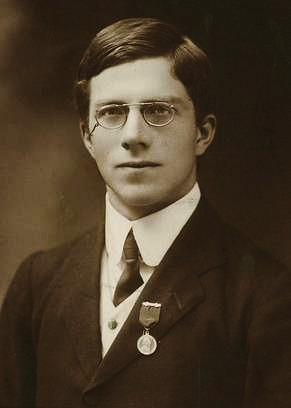


While Fisher used the Iris data set as an example to demonstrate statistical methods of classification, the Iris data itself was actually collected by Edgar Anderson, an American botanist and geneticist. Fishers's Iris data set is therefore often known as Anderson's Iris data set. Anderson was  particularly interested in the variation in plant species or a group of species, and in evolution in general. Anderson carefully examined the individual characters of the iris plants that were growing in different conditions. He used scatter diagrams and ideographs - simplified diagrams which he developed himself - so that he could visualise and compare the data more easily. These methods helped him to come to conclusions about the data.





# Importing of Modules
Here we import packages we rely on to aid analysis and visualisation of the data:

1. Pandas (a Python library used for working with datasets and is used to analyse, explore and manipulate data)
2. Numpy (a Python library used for working with arrays)
3. Matplotlib (a Python library used for plotting data and for visualisation)
4. Tabulate (a Python package used to print tabular data in nicely formatted tables)
5. Seaborn (a Python library used for data visualisation - provides informative statistical graphics)
6. Sys (a Python module that provides functions and variables that are used to manipulate parts of the Python runtime environment)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate
import seaborn as sns
import sys
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, coord_flip, theme_xkcd, geom_smooth
from sklearn.linear_model import LinearRegression
import warnings
import plotly.express as px


csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris_data =  pd.read_csv(csv_url, names = col_names)

print(f"{iris_data.info}")






<bound method DataFrame.info of      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


The Iris dataset contains three classes with a sample of three 3 classes, with each class referencing a type of iris plant. There are 50 instances of each class, with 150 instances in total.  These classes are as follows:

1. iris-setosa 
2. iris-versicolour
3. iris-virginica 

the variables for each column are as follows 

1. sepal length (cm) - float64
2. sepal width (cm) - float64
3. petal length (cm) - float64
4. petal width (cm) - float64
5. Class- object

'object' is the pandas equivalent to python's 'string' datatype. It is the most general datatype and can contain both numbers (as characters) and strings (text)
'float64' is a pandas datatype for numeric data and it is automatically assigned to columns that contain numeric characters with decimal point and/or NaN values

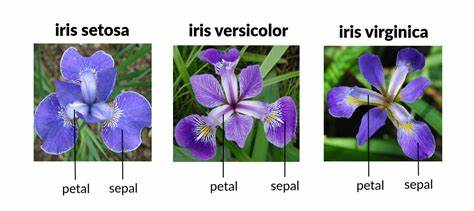

# Statistical categories

In [39]:
print(iris_data.columns)
print(f"\n{iris_data.head(5)}")
print(f"{iris_data.tail(5)}")
print(f"{iris_data.sample(5)}")




Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
    Sepal_Length  Sepal_Width  Petal_Length  P

The above output shows the first five columns along with the last five columns along with a random sample to show some of the variables. I will now test the dataset to find if there is any null values in this dataset using the isnull function.I will also test for duplicated values in the dataset.  

In [40]:
iris_data.isnull()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [41]:
iris_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

As we can see there is no missing values in this dataset and no duplicated values as can be seen from the bool object. 

# Summary of Each Variable


A table of statistics for each variable can be seen below:

In [42]:
print("A table of statistics for each variable can be seen below.")
print("The first table displays statistics of the data set as a whole, while Tables 2,3,4 and 5")
print("display statistics such as mean, min and max for each of the 4 variables when grouped together by class.\n")

print("Table 1 - Iris Dataset Statistics")
iris_source = iris_data.agg({'Sepal_Length': ['mean', 'min', 'max', 'std'],
                           'Sepal_Width': ['mean', 'min', 'max', 'std'],
                           'Petal_Length': ['mean', 'min', 'max', 'std'],
                           'Petal_Width': ['mean', 'min', 'max', 'std']})
print(tabulate(iris_source, headers = ["Stat", "Sepal_Length (cm)", "Sepal_Width (cm)", "Petal_Length (cm)", "Petal_Width (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Length Statistics
print("Table 2 - Iris Dataset Sepal Length Statistics")
table_of_data = iris_data.groupby('Class').agg({'Sepal_Length': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Width Statistics
print("Table 3 - Iris Dataset Sepal Width Statistics")
table_of_data = iris_data.groupby('Class').agg({'Sepal_Width': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Length Statistics
print("Table 4 - Iris Dataset Petal Length Statistics")
table_of_data = iris_data.groupby('Class').agg({'Petal_Length': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Width Statistics
print("Table 5 - Iris Dataset Petal Width Statistics")
table_of_data = iris_data.groupby('Class').agg({'Petal_Width': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print("\n")



A table of statistics for each variable can be seen below.
The first table displays statistics of the data set as a whole, while Tables 2,3,4 and 5
display statistics such as mean, min and max for each of the 4 variables when grouped together by class.

Table 1 - Iris Dataset Statistics
+--------+---------------------+--------------------+---------------------+--------------------+
|  Stat  |   Sepal_Length (cm) |   Sepal_Width (cm) |   Petal_Length (cm) |   Petal_Width (cm) |
+========+=====================+====================+=====================+====================+
|  mean  |            5.84333  |           3.054    |             3.75867 |           1.19867  |
+--------+---------------------+--------------------+---------------------+--------------------+
|  min   |            4.3      |           2        |             1       |           0.1      |
+--------+---------------------+--------------------+---------------------+--------------------+
|  max   |            7.9      | 

# Information on the variables 
1. Sepal Length as we can see is the largest variable in this dataset it has a mean of 5.8 
2. Petal Width is the smallest variable in this dataset with a mean of 1.2 
3. The largest of the sepal Widths is the iris setosa
4. Petal Length and Petal Width are both largest in the Iris virginica species, and smallest in the Iris setosa species.
5.  Petal Length is the variable with the widest spread of data, with a standard deviation of 1.7 and a range from a minimum of 1 to a maximum of 6.9.
6. Sepal Width then is the variable with the smallest spread of data, as all three species of Iris plant have similar sepal widths.


# Distribution of the Variables 
I Will begin looking on at the distribution of variables. I will start by using a histogram to  visualise the distribution of the variables in a dataset. In this project I will be looking at the four variables Petal Length, Petal Width, Sepal Length and Sepal Width - by Class. 

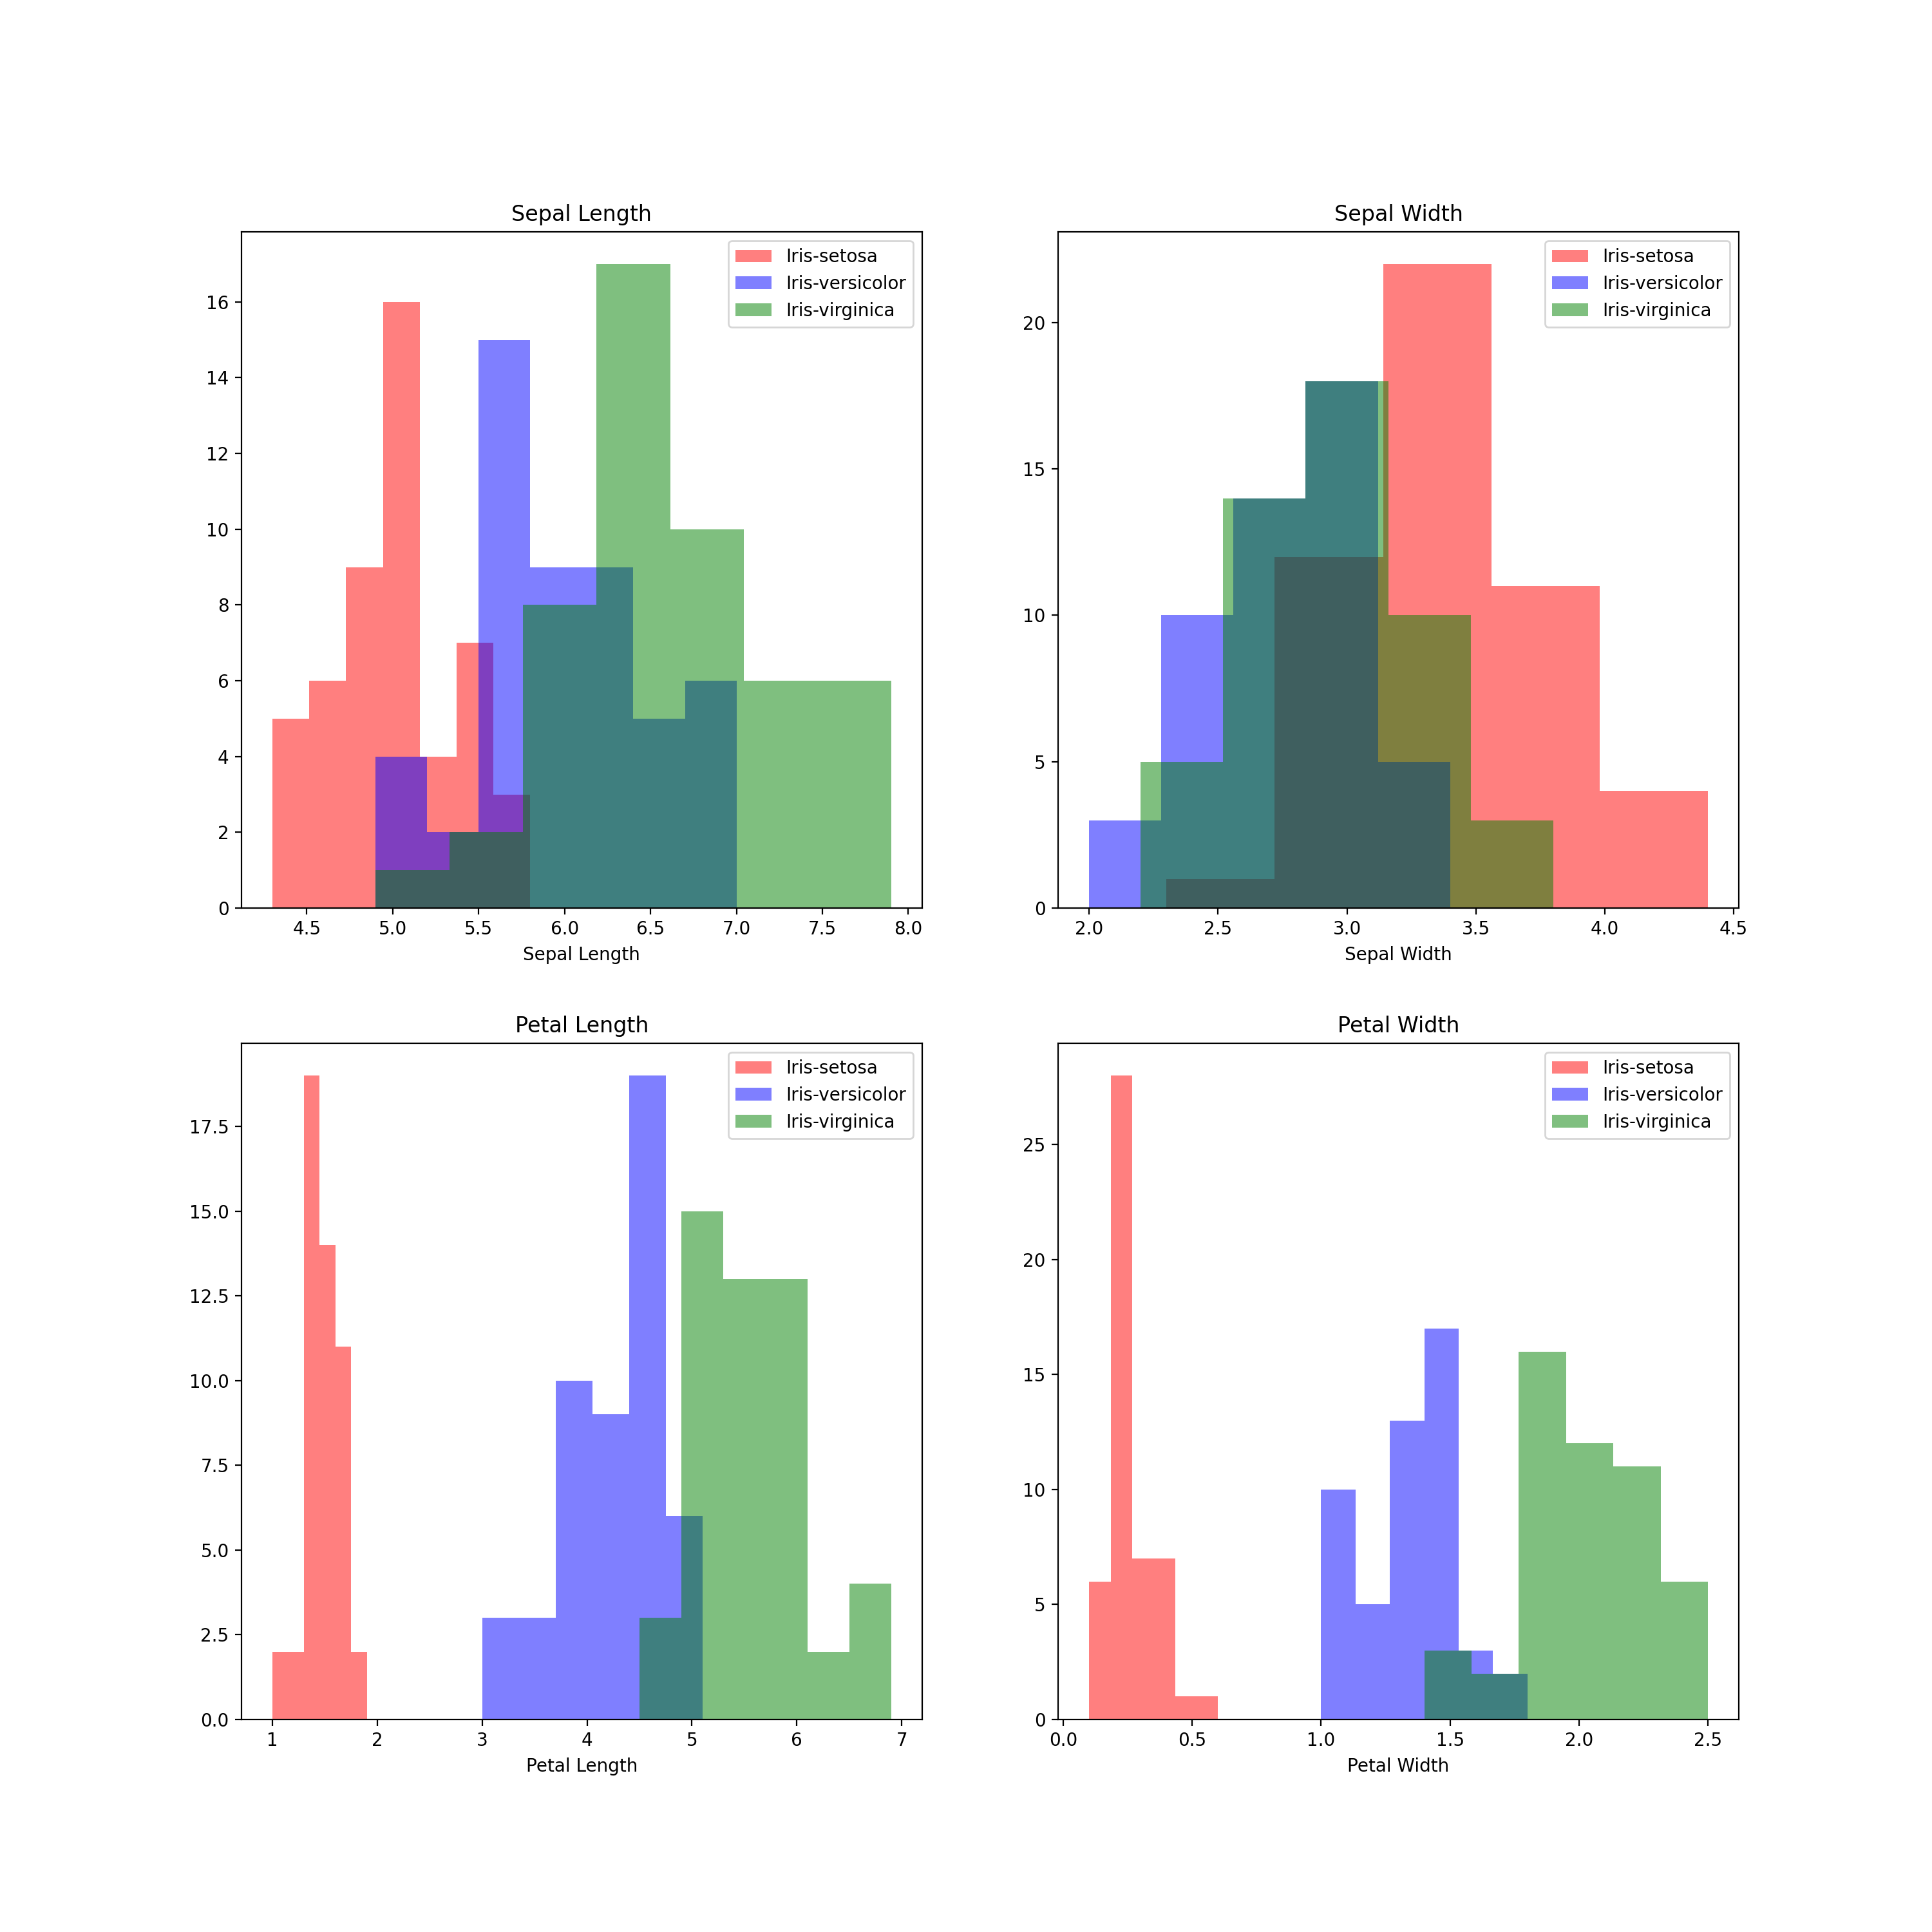

In [43]:
fig, axes = plt.subplots(2,2, figsize = (15,15))            
setosa = iris_data[iris_data.Class == "Iris-setosa"]                  
versicolor = iris_data[iris_data.Class == "Iris-versicolor"]
virginica = iris_data[iris_data.Class == "Iris-virginica"]

# sepal length histogram 
axes[0,0].set_title("Sepal Length")    
axes[0,0].set(xlabel='Sepal Length')
axes[0,0].hist(setosa['Sepal_Length'], bins=7, alpha=0.5, label="Iris-setosa", color='red')            
axes[0,0].hist(versicolor['Sepal_Length'], bins=7, alpha=0.5, label="Iris-versicolor", color='blue')  
axes[0,0].hist(virginica['Sepal_Length'], bins=7, alpha=0.5, label="Iris-virginica", color='green')    
axes[0,0].legend(loc='upper right')                         
    
# sepal width histogram 
axes[0,1].set_title("Sepal Width")    
axes[0,1].set(xlabel='Sepal Width')
axes[0,1].hist(setosa['Sepal_Width'], bins=5, alpha=0.5, label="Iris-setosa", color='red')
axes[0,1].hist(versicolor['Sepal_Width'], bins=5, alpha=0.5, label="Iris-versicolor", color='blue')
axes[0,1].hist(virginica['Sepal_Width'], bins=5, alpha=0.5, label="Iris-virginica", color='green')
axes[0,1].legend(loc='upper right')

# petal length histogram 
axes[1,0].set_title("Petal Length")
axes[1,0].set(xlabel='Petal Length')
axes[1,0].hist(setosa['Petal_Length'], bins=6, alpha=0.5, label="Iris-setosa", color='red')
axes[1,0].hist(versicolor['Petal_Length'], bins=6, alpha=0.5, label="Iris-versicolor", color='blue')
axes[1,0].hist(virginica['Petal_Length'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,0].legend(loc='upper right');

# petal width histogram 
axes[1,1].set_title("Petal Width")
axes[1,1].set(xlabel='Petal Width')
axes[1,1].hist(setosa['Petal_Width'], bins=6, alpha=0.5, label="Iris-setosa", color='red')
axes[1,1].hist(versicolor['Petal_Width'], bins=6, alpha=0.5, label="Iris-versicolor", color='blue')
axes[1,1].hist(virginica['Petal_Width'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,1].legend(loc='upper right');

From the histograms above, Sepal Width appears to be quite normally distributed.

1. In a normal distribution, data is symmetrically distributed with no skew.
2. The measures of central tendency (mean, mode and median) are the same.
3. Most of the values cluster around the central region.
4. A well-known example of this type of distribution is often referred to as the Bell Curve. 

I am now going to use Numpy Random Generator as we have the mean and standard devetion for sepal Width to generate 100,000 similar values using normally generated data. This will allow more analysis to be performed on sepal widths of Iris plants all over the world, and not just on the small amount of data recorded in the Iris dataset.

We can do this using all three Iris plant species, as well as further classifying the data by species and generating normally distributed data for sepal width for each fo the three species of Iris plant. I am going to this by using the data in table one as inputs.

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 8.000e+00, 7.000e+00, 1.200e+01, 1.400e+01, 2.000e+01,
        2.700e+01, 3.800e+01, 3.800e+01, 5.000e+01, 6.400e+01, 8.300e+01,
        1.210e+02, 1.340e+02, 1.540e+02, 2.160e+02, 2.450e+02, 3.160e+02,
        3.860e+02, 4.490e+02, 5.790e+02, 6.780e+02, 7.450e+02, 8.340e+02,
        9.890e+02, 1.150e+03, 1.350e+03, 1.464e+03, 1.633e+03, 1.761e+03,
        2.025e+03, 2.189e+03, 2.460e+03, 2.503e+03, 2.670e+03, 2.993e+03,
        3.165e+03, 3.245e+03, 3.406e+03, 3.474e+03, 3.435e+03, 3.511e+03,
        3.536e+03, 3.459e+03, 3.513e+03, 3.394e+03, 3.378e+03, 3.159e+03,
        2.948e+03, 2.927e+03, 2.756e+03, 2.513e+03, 2.340e+03, 2.243e+03,
        1.964e+03, 1.850e+03, 1.589e+03, 1.386e+03, 1.281e+03, 1.129e+03,
        9.730e+02, 8.670e+02, 7.240e+02, 6.270e+02, 4.880e+02, 4.540e+02,
        3.800e+02, 3.060e+02, 2.540e+0

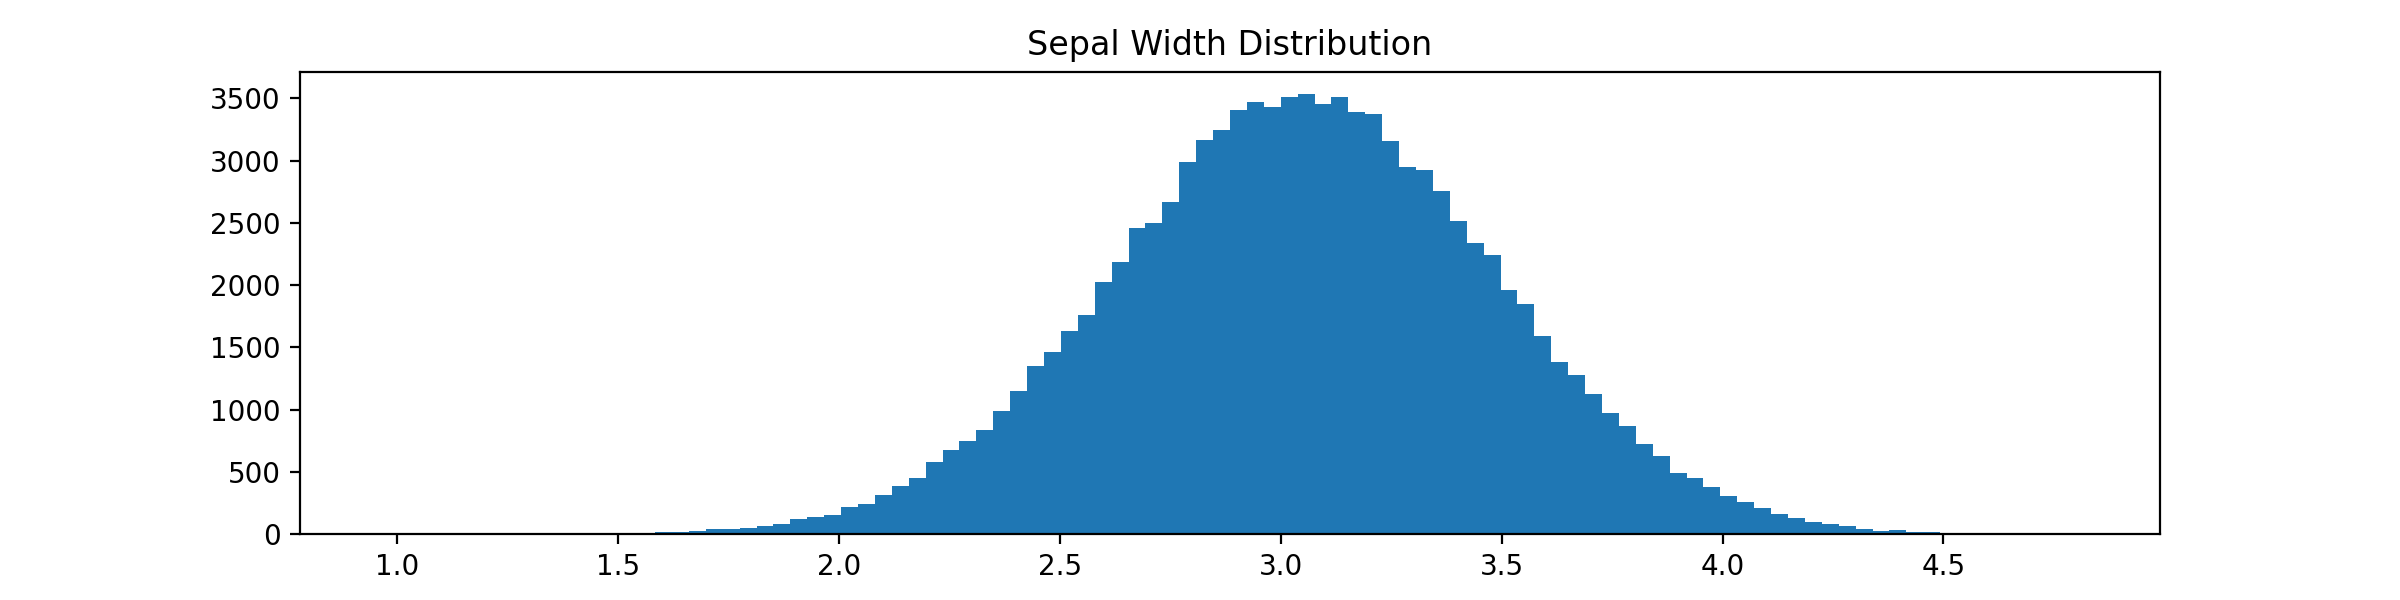

In [44]:
sepal_width_dist = np.random.normal(loc=3.054, scale=0.433594, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Sepal Width Distribution")
ax.hist(sepal_width_dist, bins=100, density=False)

 I can dive further by breaking the data down by species, ramdomly generated data for sepal width for each of the three species can be obtained.

(array([3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 7.000e+00, 7.000e+00,
        5.000e+00, 6.000e+00, 8.000e+00, 1.100e+01, 1.500e+01, 1.400e+01,
        1.600e+01, 2.900e+01, 4.900e+01, 4.300e+01, 5.300e+01, 8.000e+01,
        1.030e+02, 1.060e+02, 1.520e+02, 1.530e+02, 2.150e+02, 2.610e+02,
        3.150e+02, 3.460e+02, 4.330e+02, 5.290e+02, 5.660e+02, 6.830e+02,
        8.230e+02, 9.060e+02, 1.048e+03, 1.128e+03, 1.310e+03, 1.390e+03,
        1.688e+03, 1.707e+03, 1.897e+03, 2.101e+03, 2.235e+03, 2.519e+03,
        2.603e+03, 2.742e+03, 2.862e+03, 3.018e+03, 3.080e+03, 3.155e+03,
        3.130e+03, 3.336e+03, 3.268e+03, 3.370e+03, 3.217e+03, 3.112e+03,
        3.144e+03, 2.927e+03, 2.911e+03, 2.773e+03, 2.632e+03, 2.606e+03,
        2.533e+03, 2.220e+03, 2.058e+03, 1.954e+03, 1.750e+03, 1.603e+03,
        1.483e+03, 1.312e+03, 1.188e+03, 1.048e+03, 9.030e+02, 8.340e+02,
        6.510e+02, 5.760e+02, 5.080e+02, 4.530e+02, 3.840e+02, 3.250e+02,
        2.410e+02, 2.280e+02, 1.970e+0

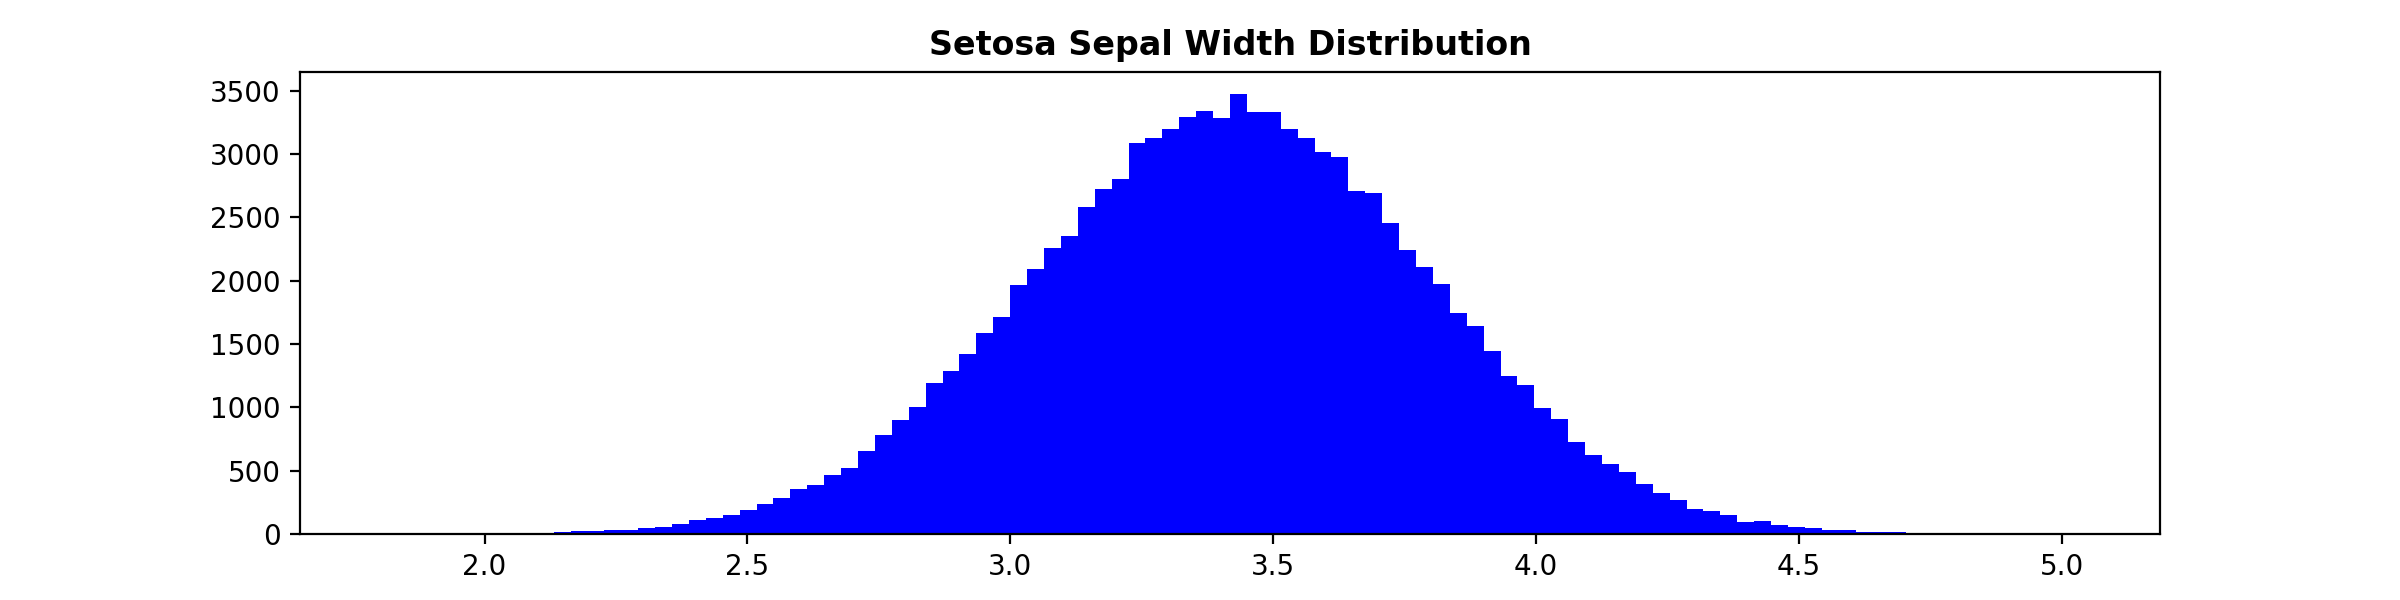

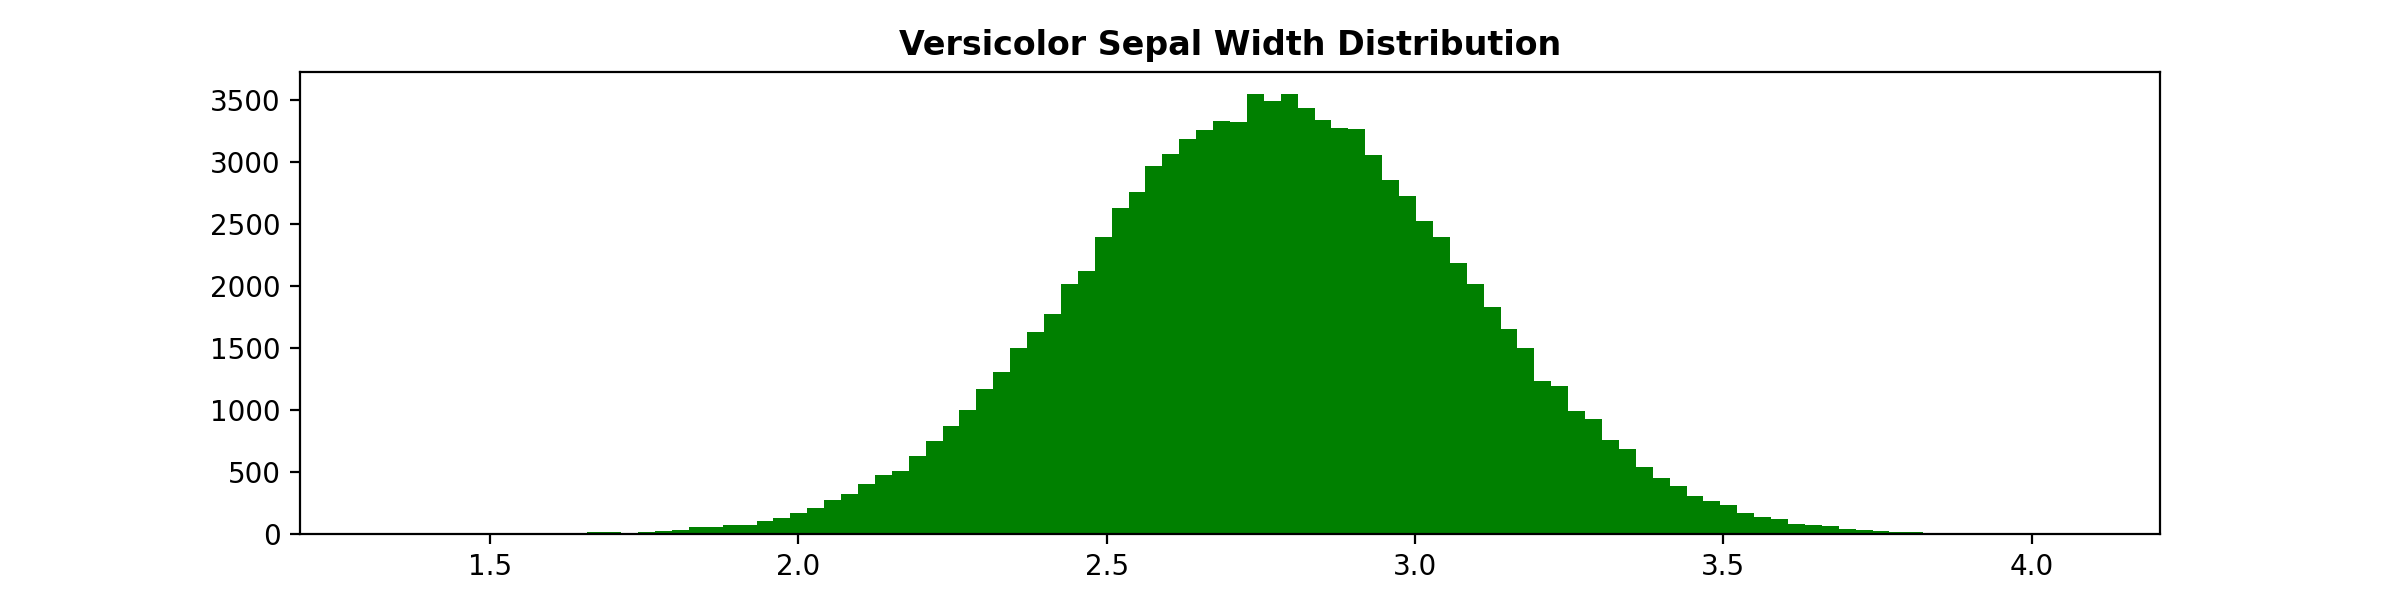

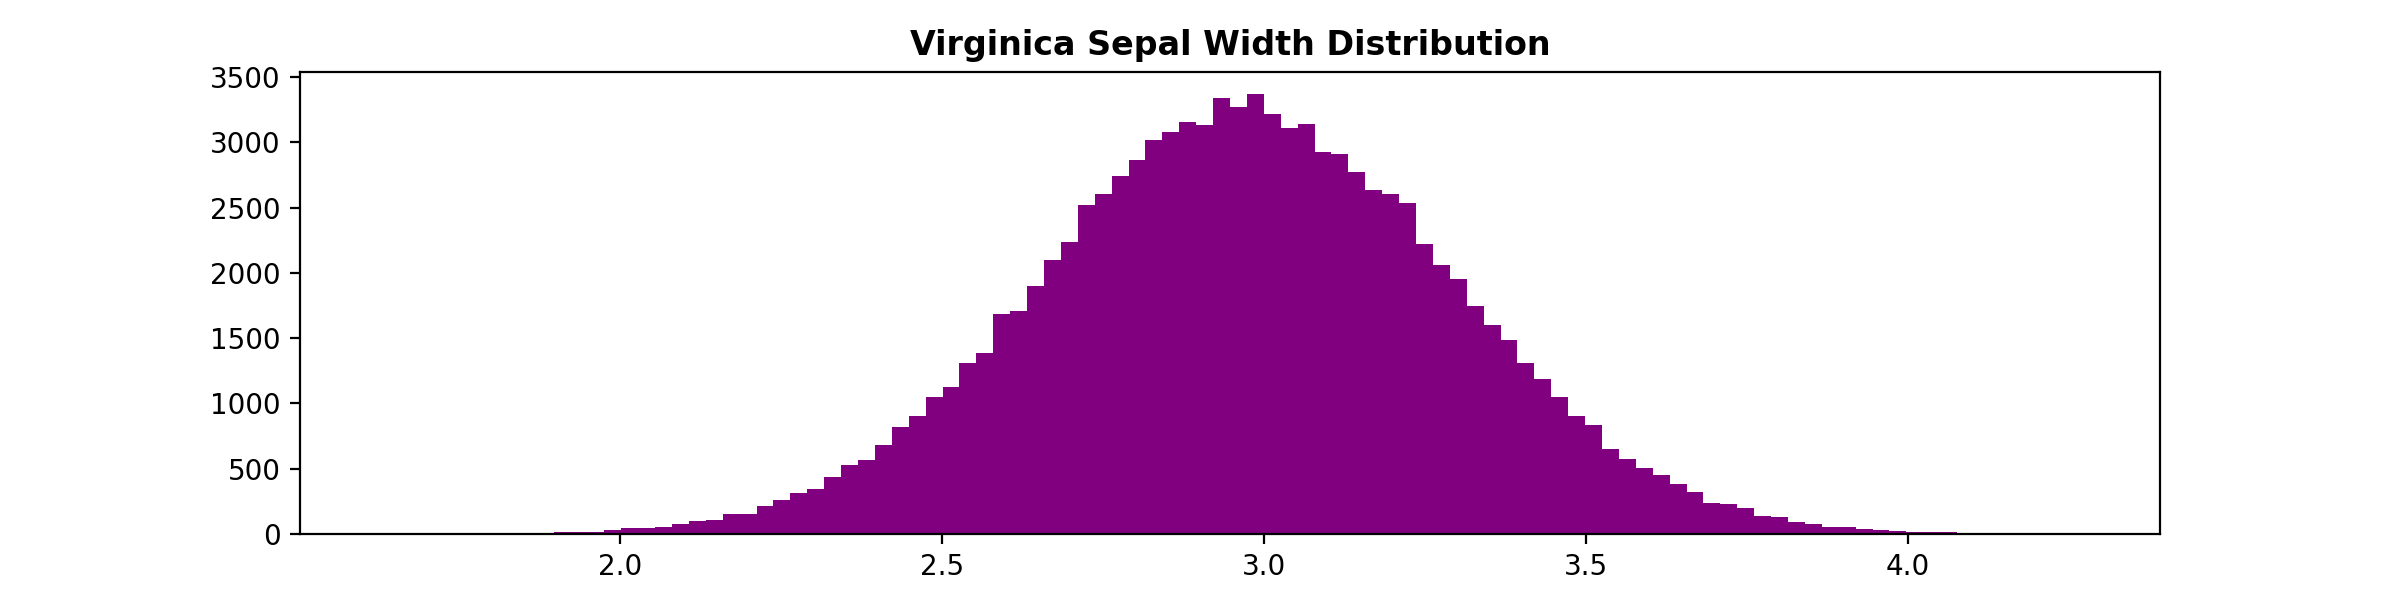

In [45]:
setosa_sepal_width_dist = np.random.normal(loc=3.418, scale=0.3810274, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Setosa Sepal Width Distribution", fontweight='bold')
ax.hist(setosa_sepal_width_dist, bins=100, density=False, color='blue')
# random generator for Versicolor Sepal Width
versicolor_sepal_width_dist = np.random.normal(loc=2.77, scale=0.313798, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Versicolor Sepal Width Distribution", fontweight='bold')
ax.hist(versicolor_sepal_width_dist, bins=100, density=False, color='green')

# random generator for Virginica Sepal Width
virginica_sepal_width_dist = np.random.normal(loc=2.974, scale=0.322497, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Virginica Sepal Width Distribution", fontweight='bold')
ax.hist(virginica_sepal_width_dist, bins=100, density=False, color='purple')

# PDF
I am now going to plot the probability density function (PDF) of each variable. Probability Density Function is the function of probability defined for various distributions of variables. 

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot`

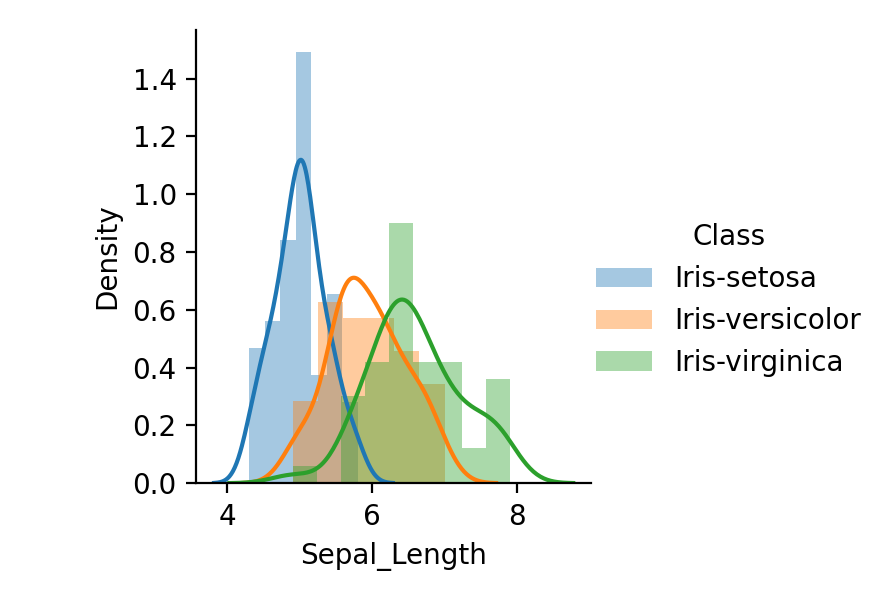

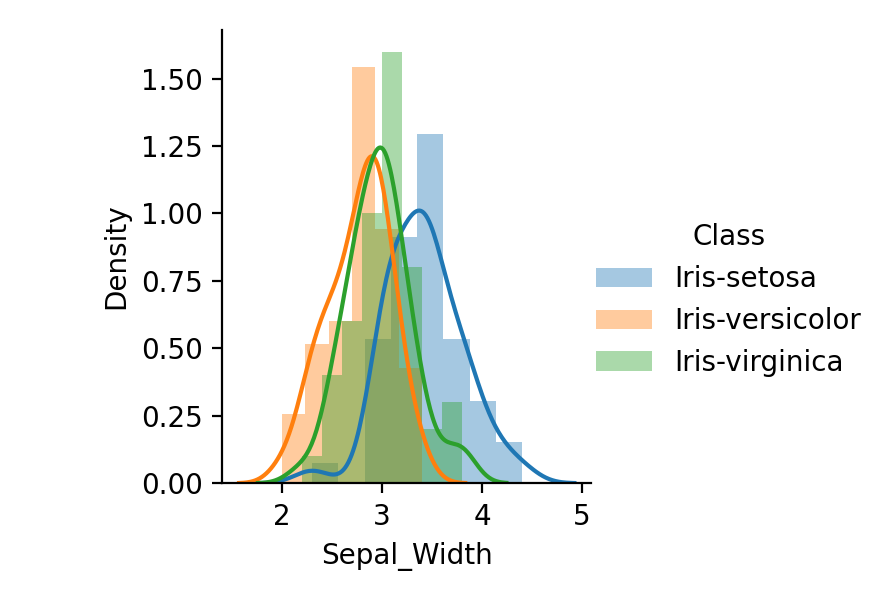

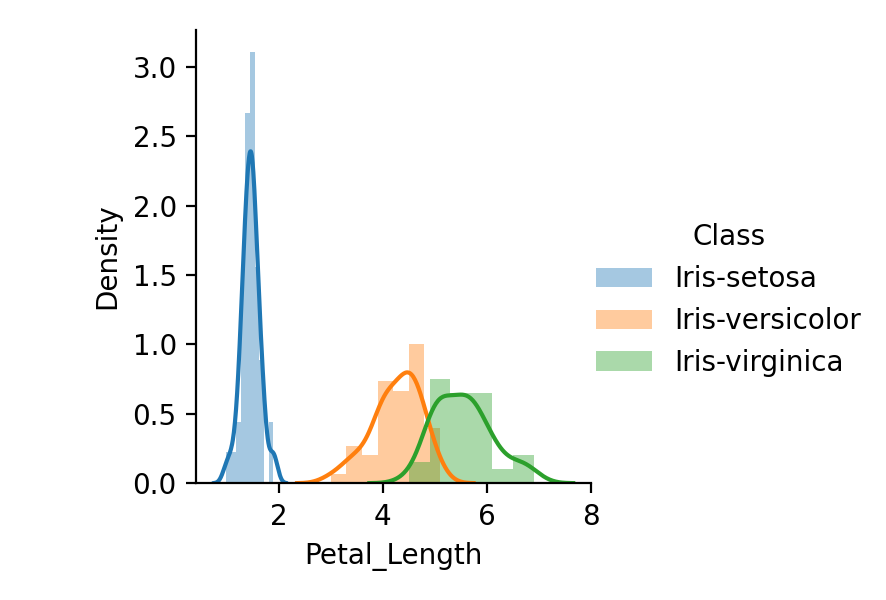

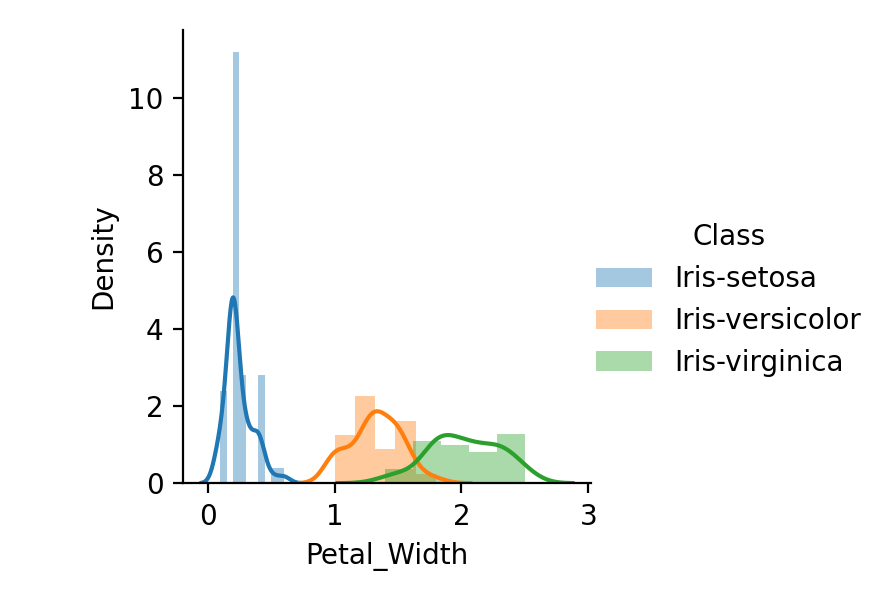

In [46]:
sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Sepal_Length") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Sepal_Width") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Petal_Length") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Petal_Width") \
.add_legend()
plt.show()

1. The first plot above shows that there is quite a lot of overlap between the sepal length class. 
2. plot 2 shows that there is a higher overlap on the sepal width class. 
3. we can see from plot 3 and plot 4 that there is more seperation in petal length and and petal width class and that the setosa is seperated in these plots from versicolor and virginica. 
4. Plot 3 and 4 also shows that Petal Width and Petal Length has a good Classification feature. Where Sepal width and sepal length does not have much a Classification feature. 

# bar chart
Next I am going to look at using a bar chart to visualise the data. A bar chart plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values.



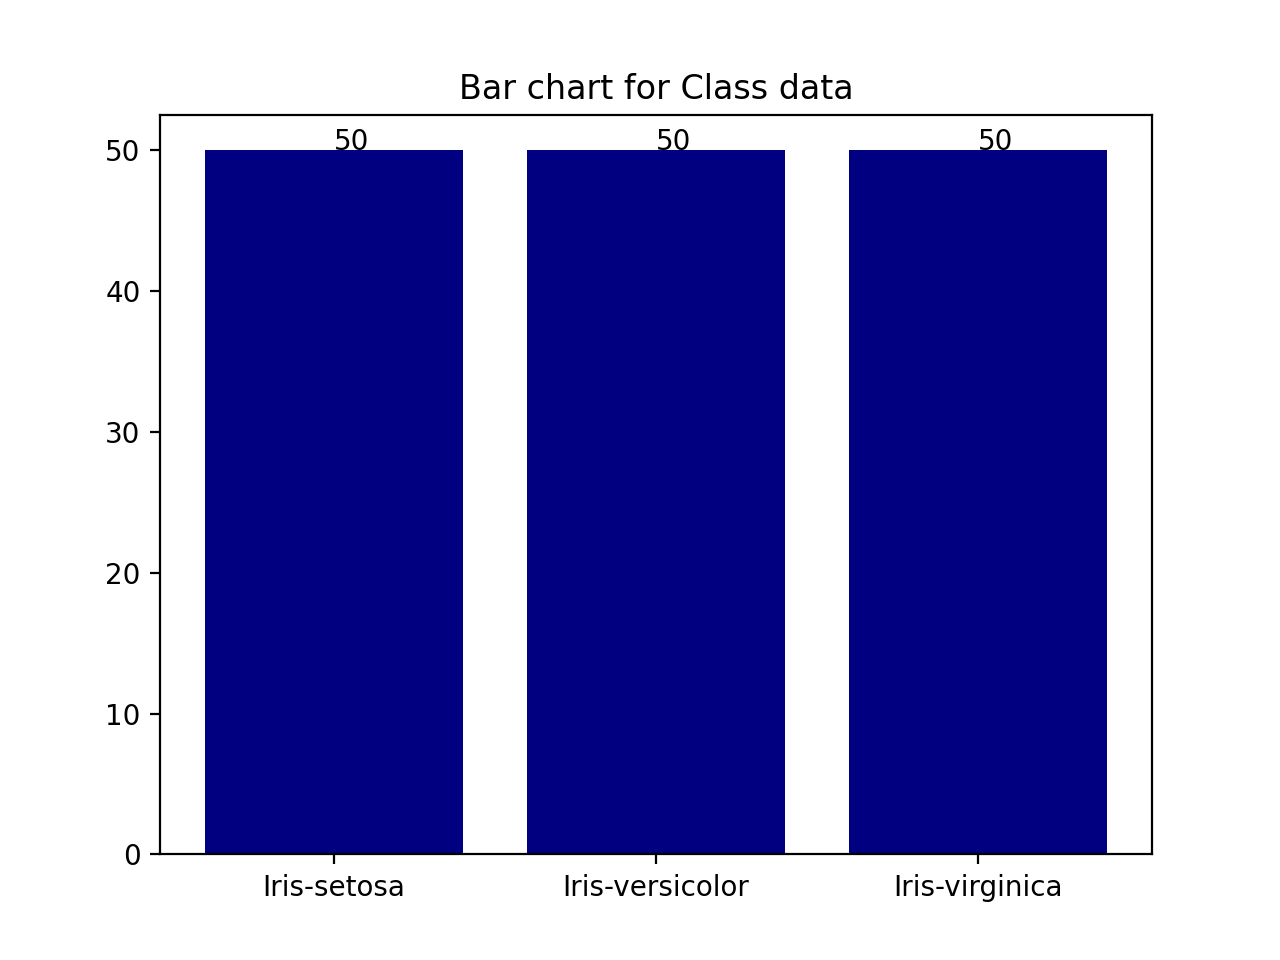

In [47]:
freq = iris_data['Class'].value_counts()
Class = freq.index
plt.bar(Class, freq, color='navy')
plt.title('Bar chart for Class data')
for i, f in enumerate(freq):
    plt.text(i, f,  str(f))
plt.show()


The above bar chart shows the breakdown setosa versicolor and virginica it shows that each class has got 50 variables each and is even in the dataset. 

# piecharts 

A pie chart is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice  is proportional to the quantity it represents.

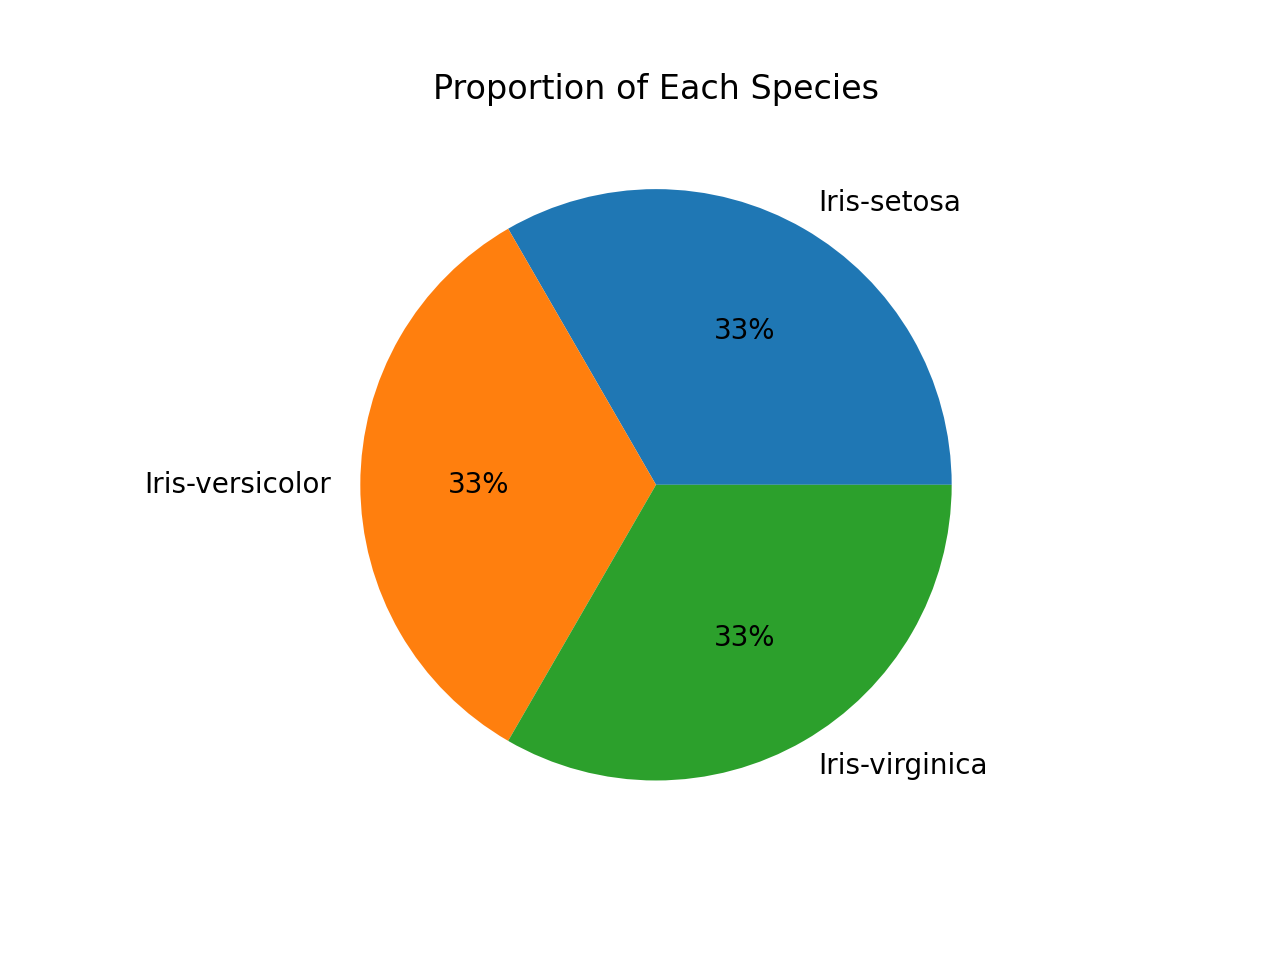

In [48]:
species_counts = iris_data['Class'].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%.0f%%')
plt.title('Proportion of Each Species')
plt.show()

# Jointplots

A jointplot is a type of visualization that displays the joint distribution of two variables. It is a combination of a scatter plot and one or more histograms, and can be used to visualize the relationship between the two variables and the distribution of each variable separately, The scatter plot portion of a jointplot shows the relationship between the two variables, while the histograms show the distribution of each variable individually. This allows you to see both the relationship between the variables and the distribution of each variable at the same time.

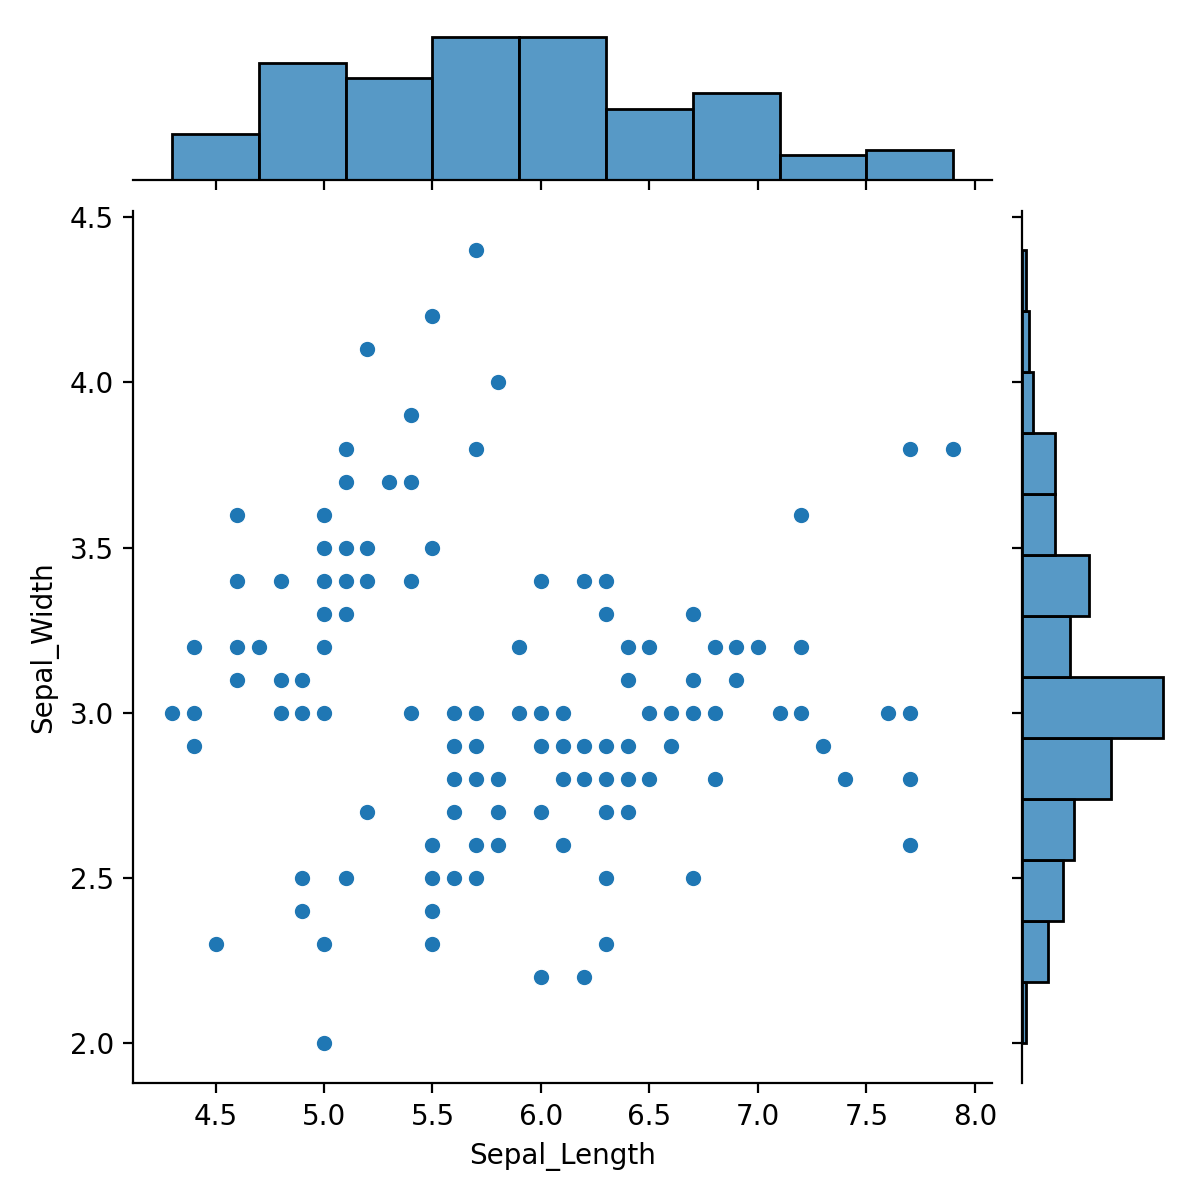

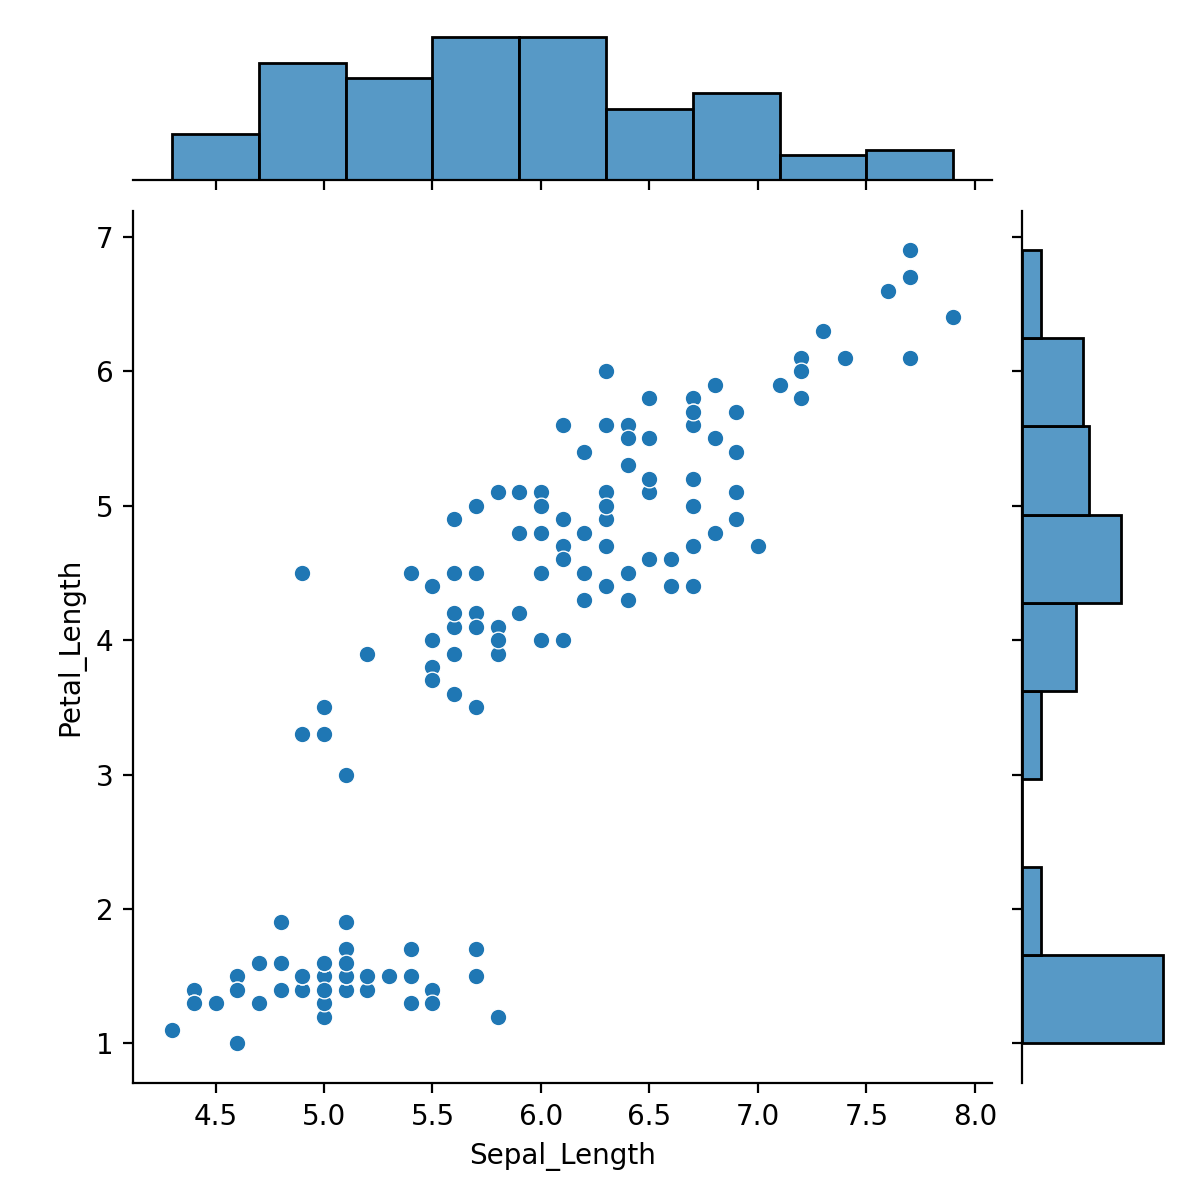

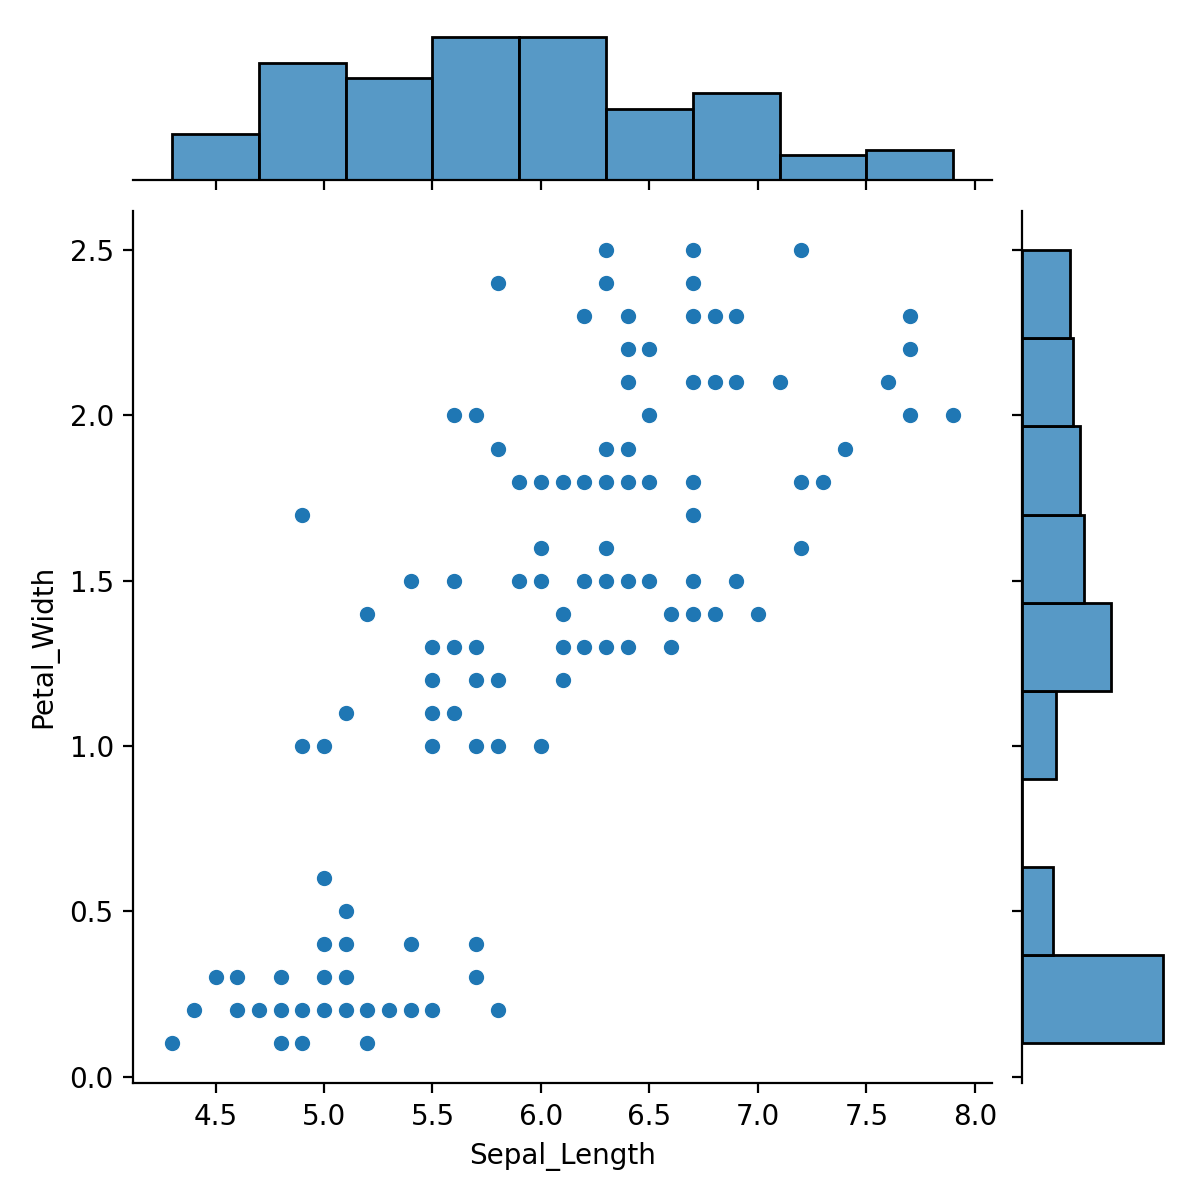

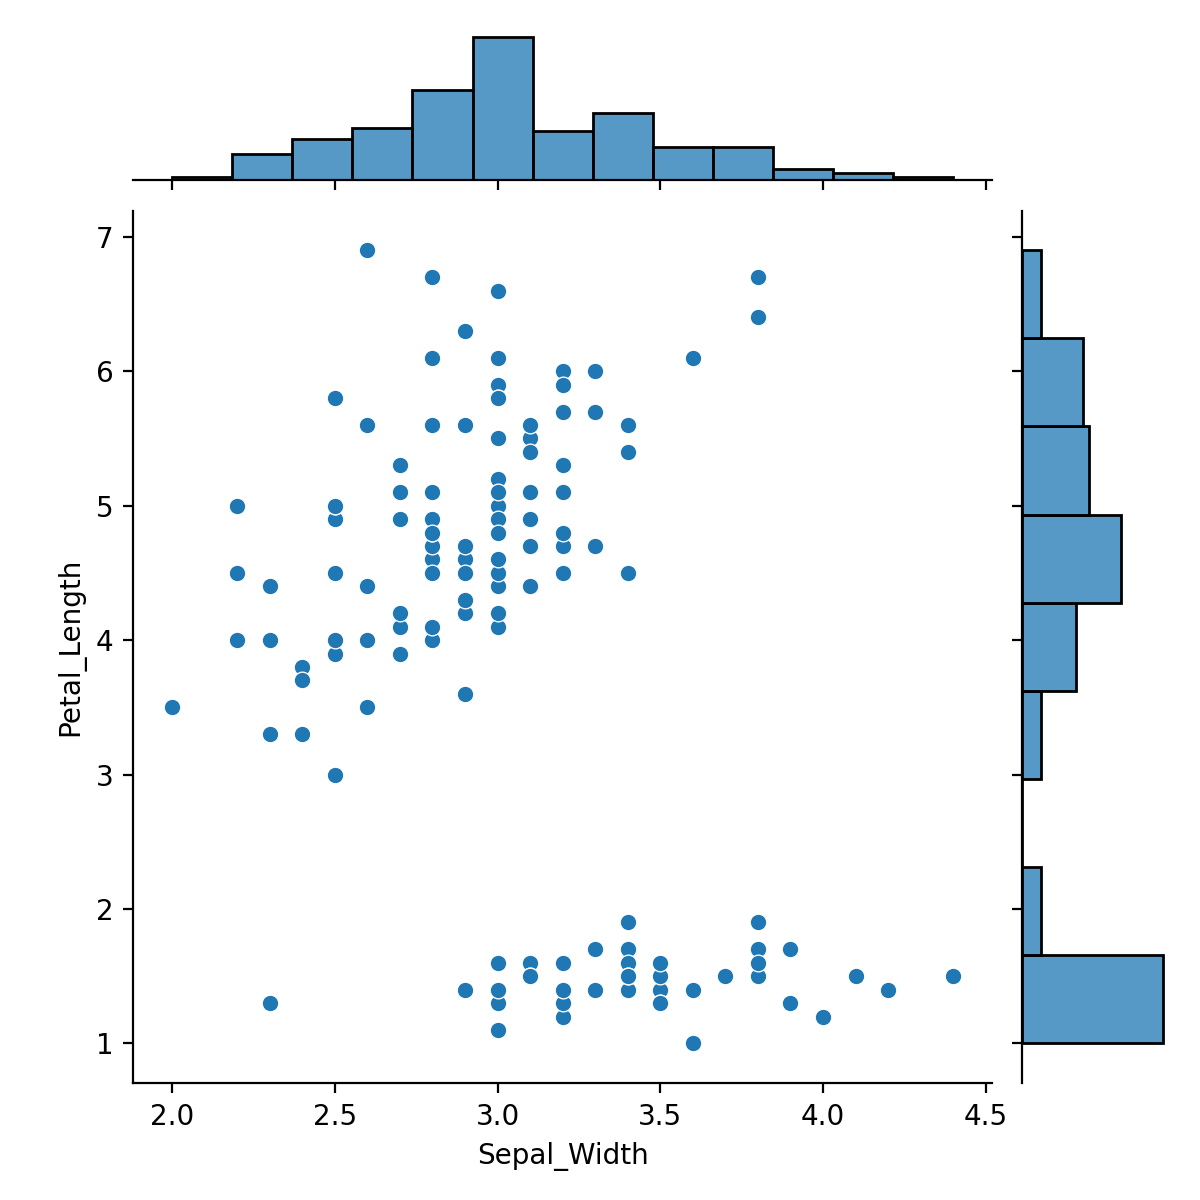

In [49]:
sns.jointplot(x='Sepal_Length', y='Sepal_Width', data=iris_data)
plt.show()

sns.jointplot(x='Sepal_Length', y='Petal_Length', data=iris_data)
plt.show()

sns.jointplot(x='Sepal_Length', y='Petal_Width', data=iris_data)
plt.show()

sns.jointplot(x='Sepal_Width', y='Petal_Length', data=iris_data)
plt.show()


# boxplots 

Box plots are effective tools for visualizing the distribution of numeric data. They offer a high-level overview of essential statistical characteristics, a good visual representation on the central tendencies within the data, based on five attributes; minimum, first quartile, median, third quartile and maximum. The box represents the central 50% of the data with a line representing the median value, while the whiskers cover the remaining range of the data. Outliers are plotted outside the whiskers range as individual points.

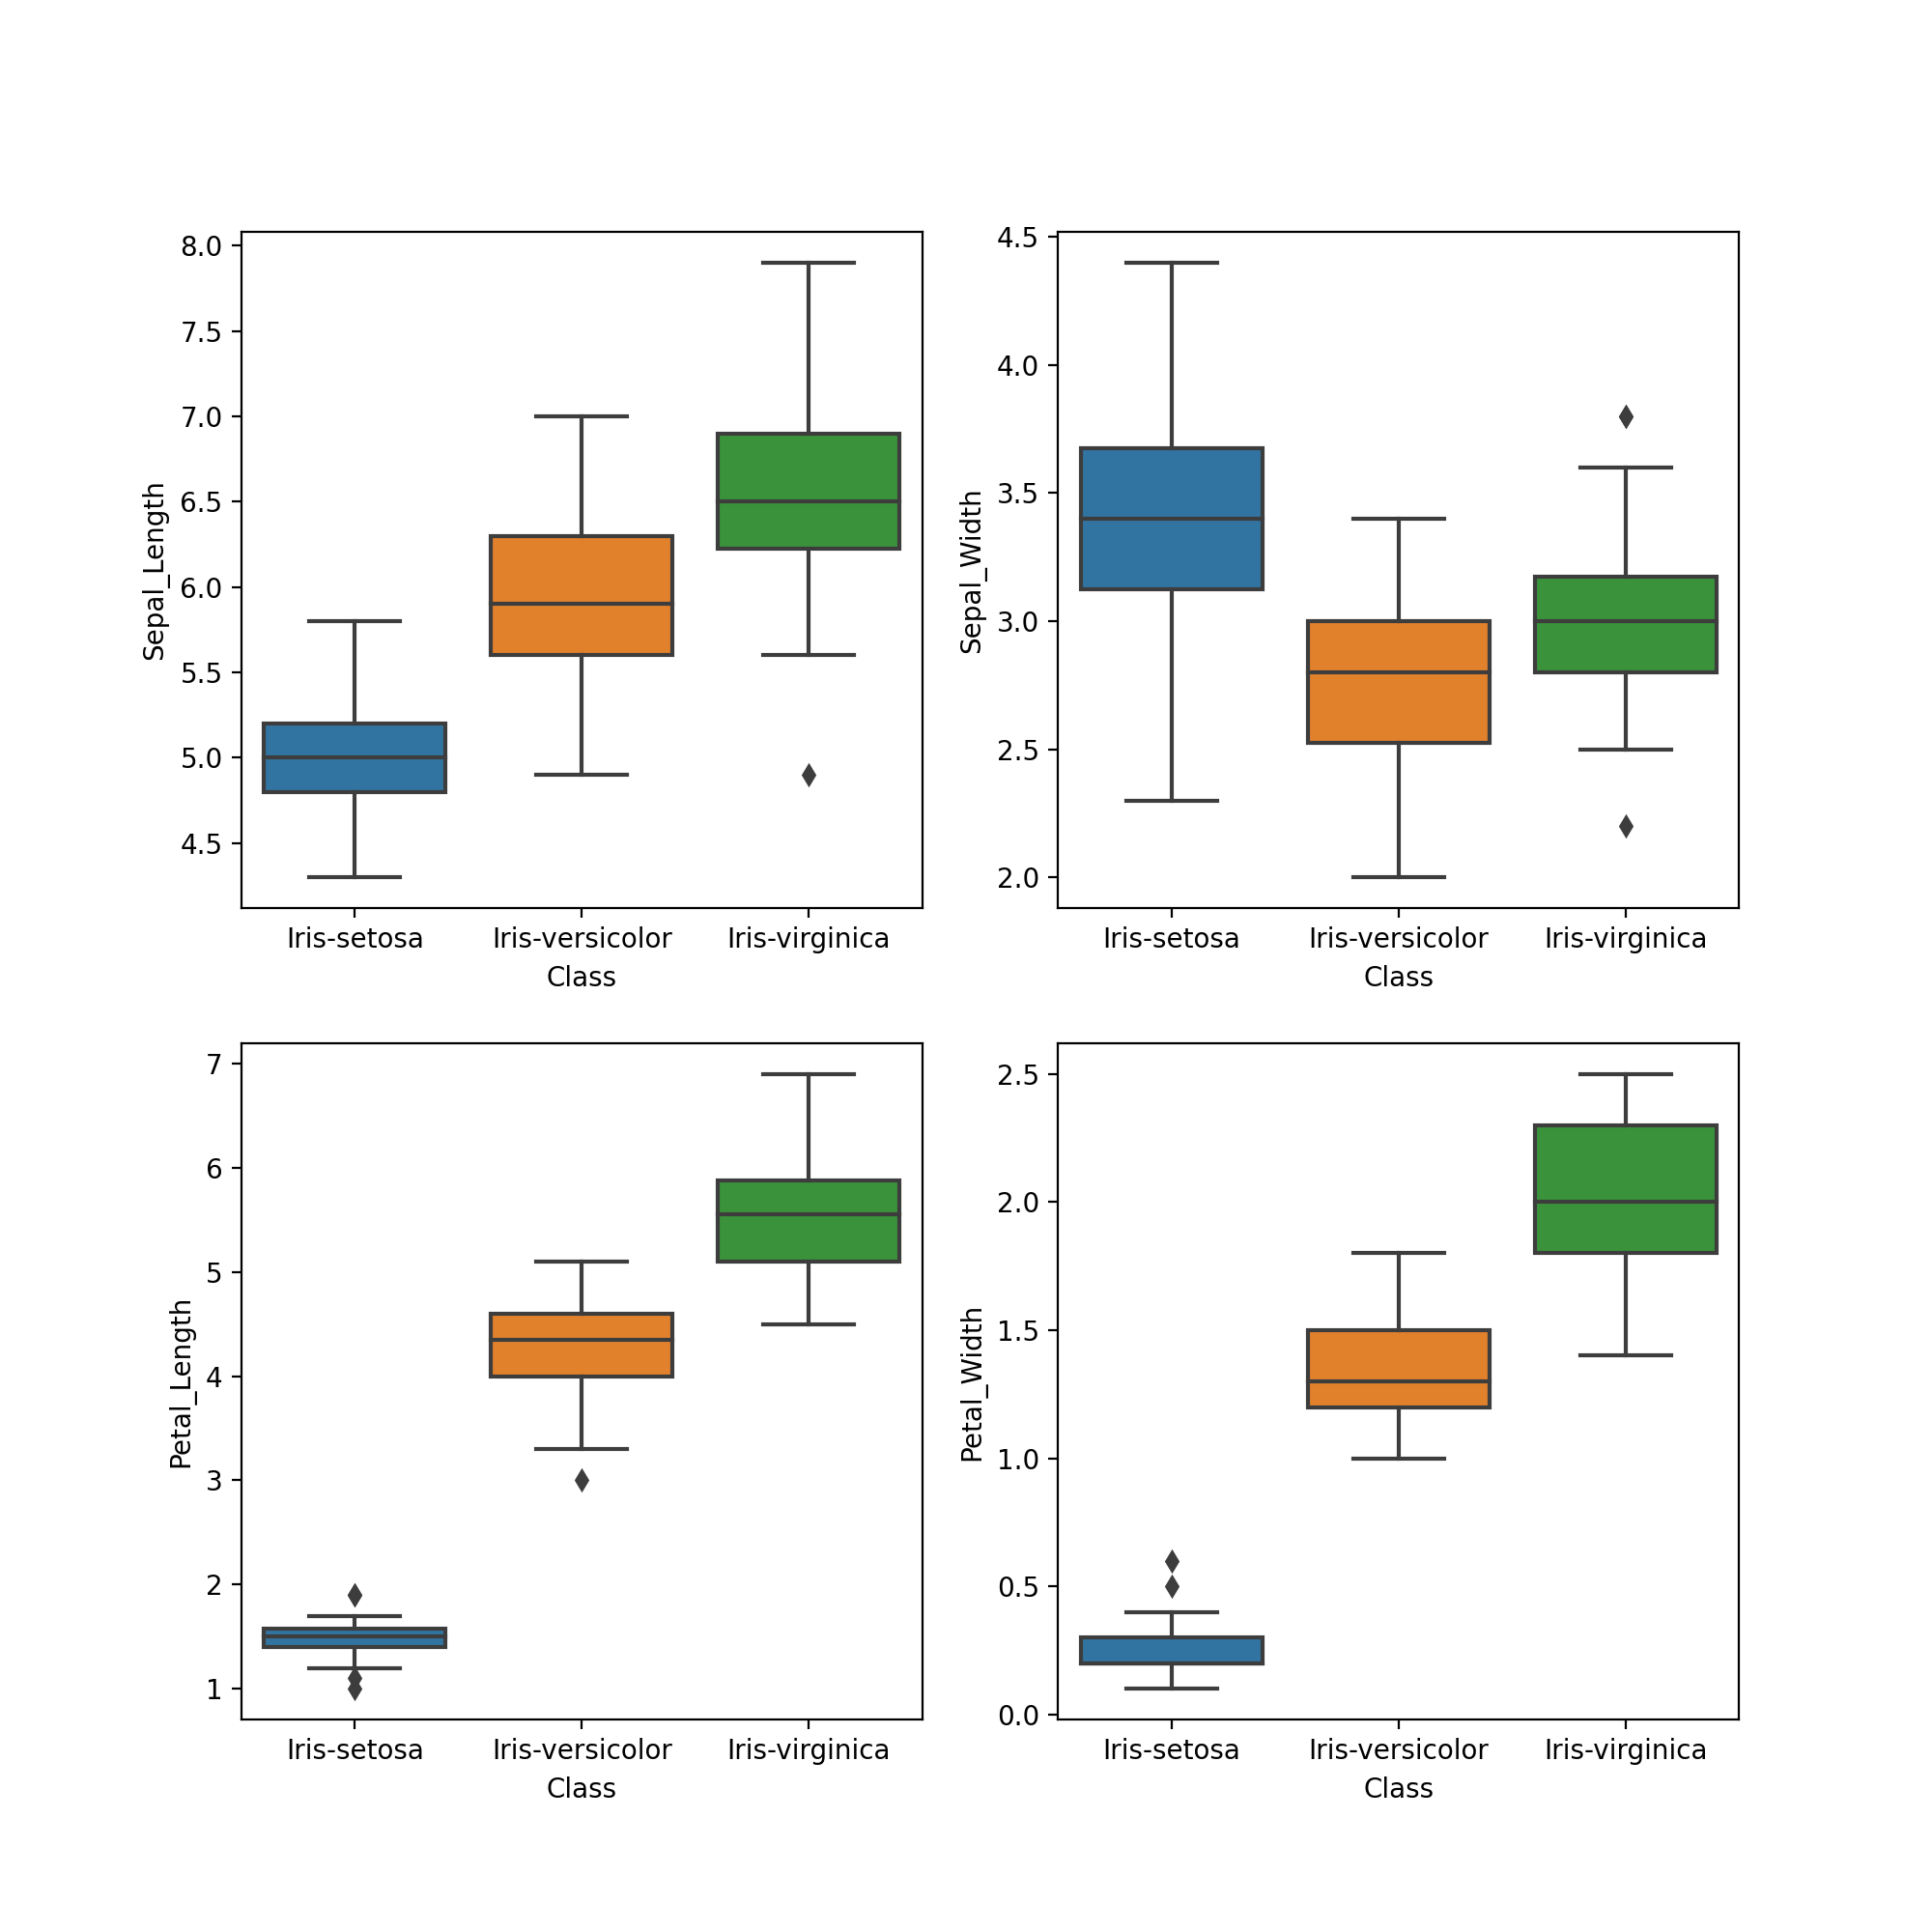

In [50]:
# as seen from https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/

def graph(y):
    sns.boxplot(x="Class", y=y, data=iris_data)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Sepal_Length')
 
plt.subplot(222)
graph('Sepal_Width')
 
plt.subplot(223)
graph('Petal_Length')
 
plt.subplot(224)
graph('Petal_Width')
 
plt.show()

The box graph above shows that setosa is having the smallest feature and is less distributed. It also shows that versicolor has average features and is distributed in a average manner. The virginica is highly distributed. 

# Violinplot 

The violin plot shows density of the length and width in the Class. The thinner part denotes that there is less density whereas the fatter part conveys higher density

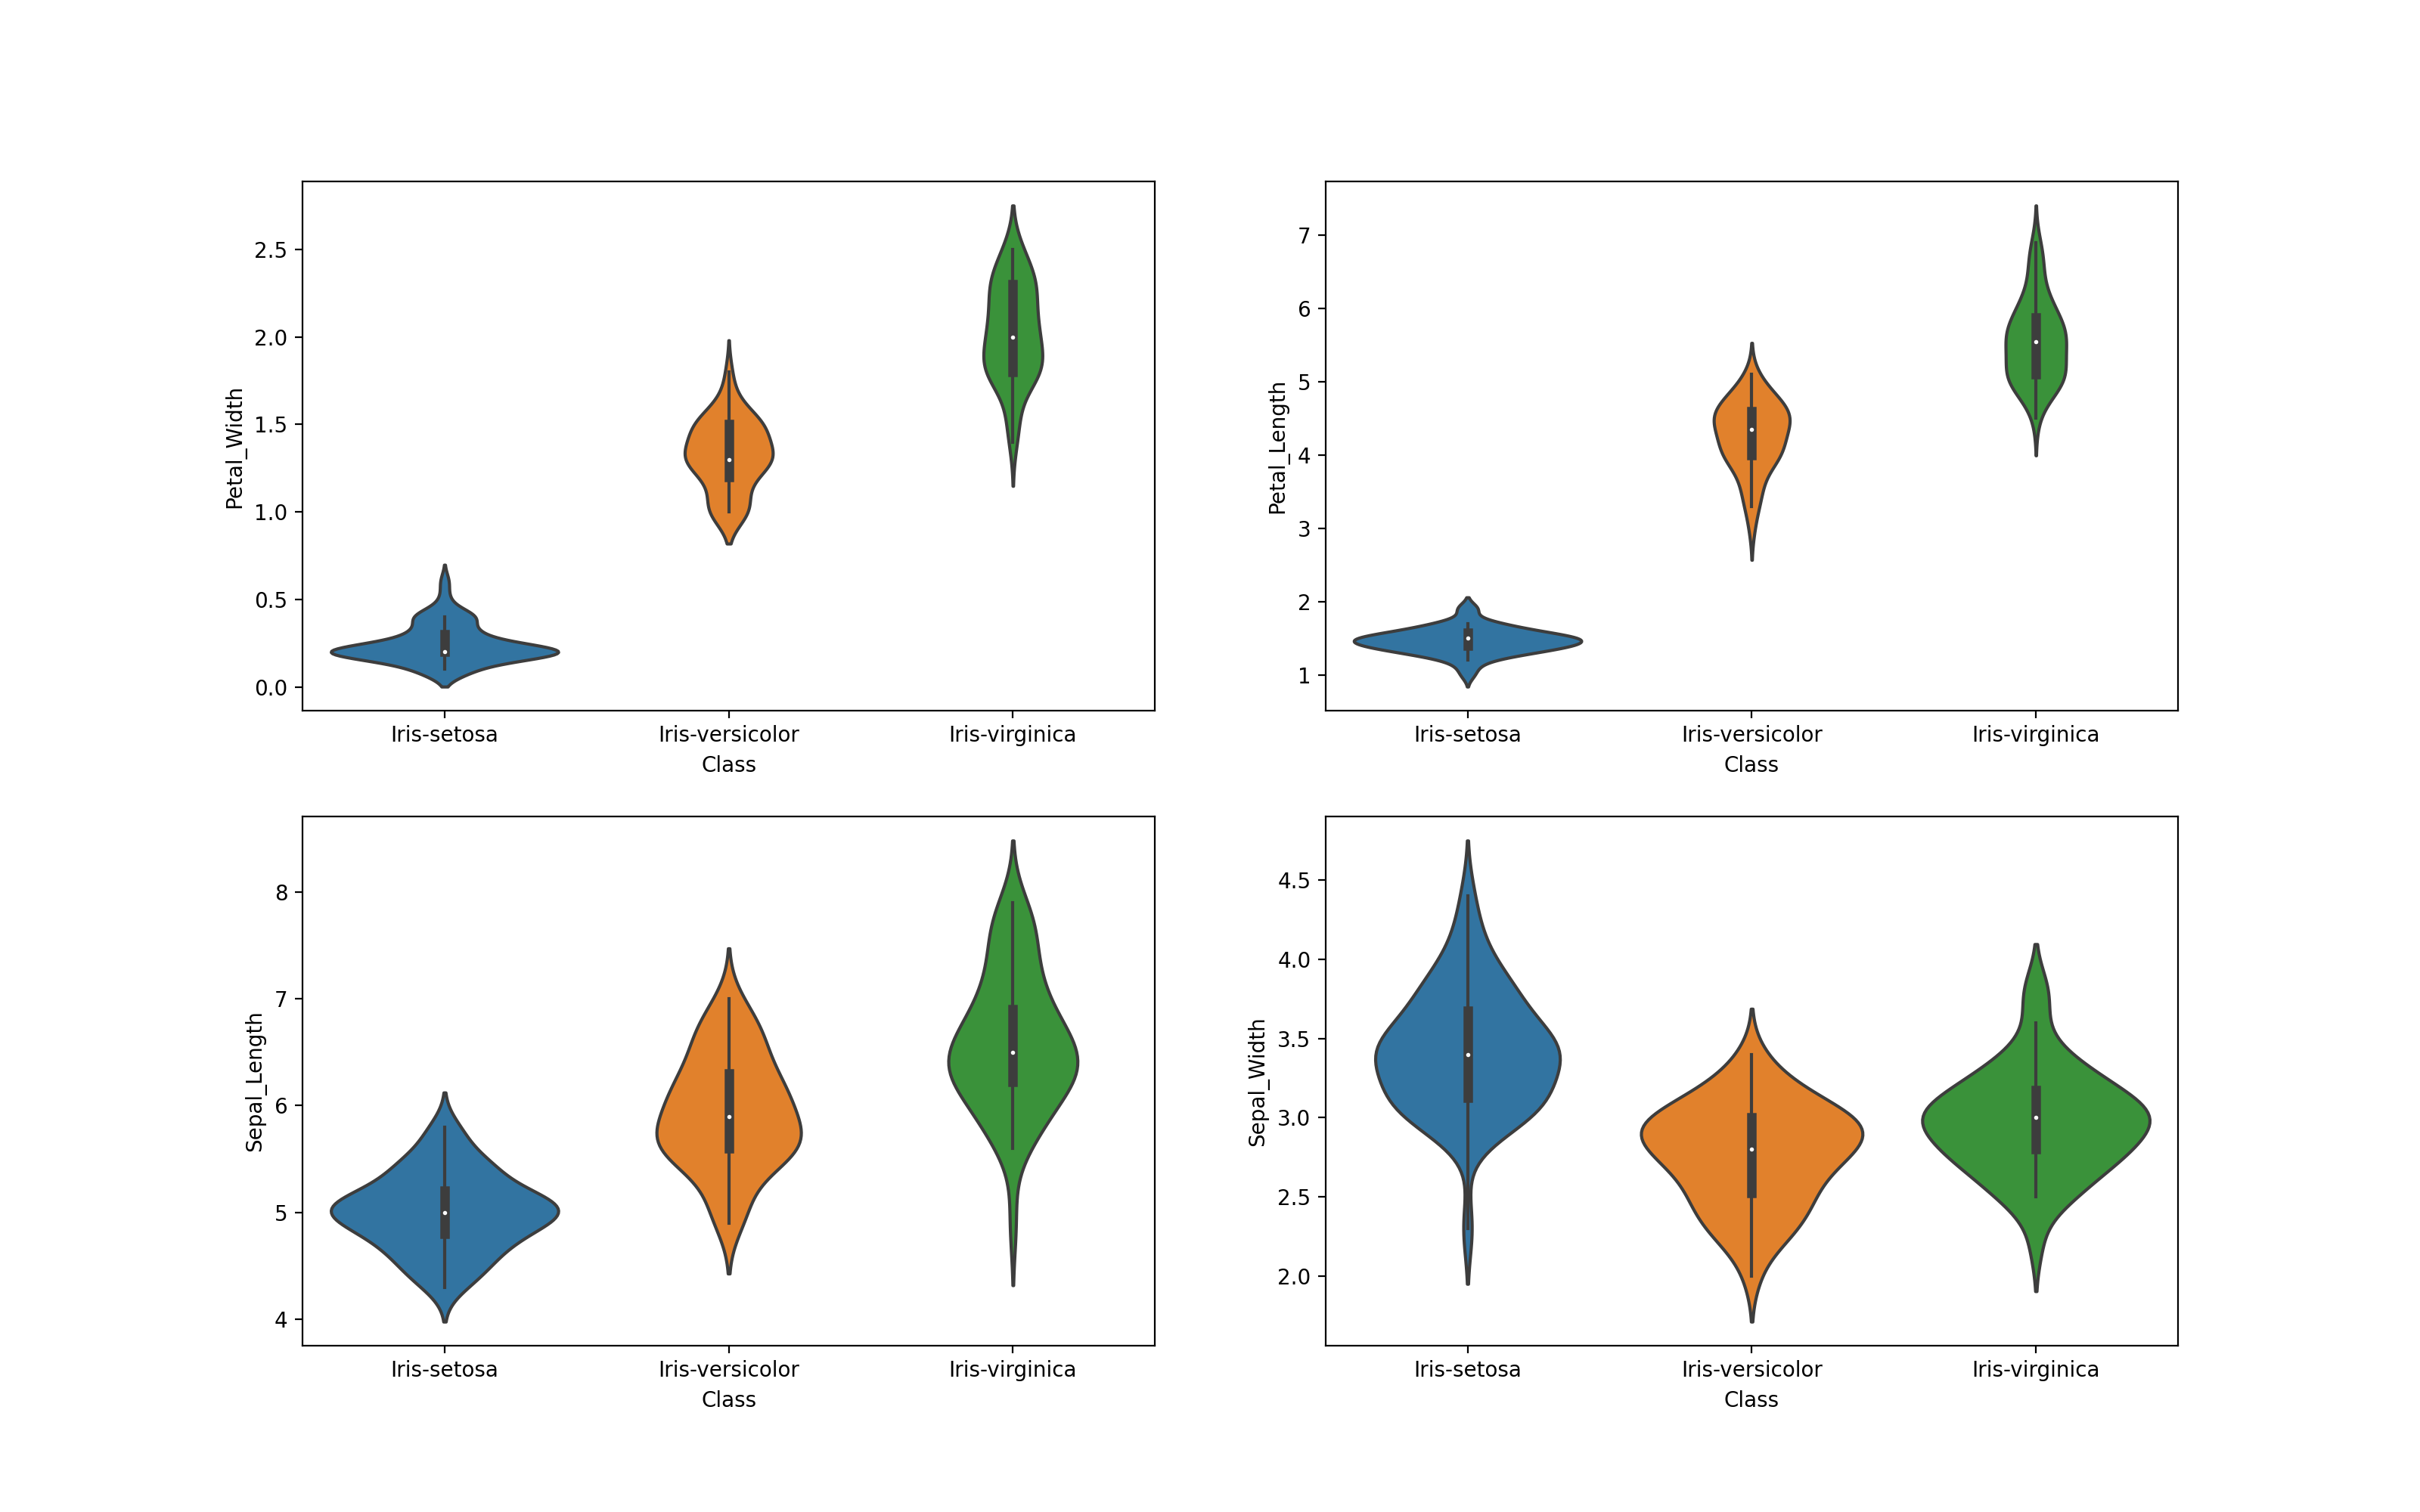

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.violinplot( y='Petal_Width', x= 'Class', data=iris_data,  ax=axes[0, 0])
sns.violinplot( y='Petal_Length', x= 'Class', data=iris_data, ax=axes[0, 1])
sns.violinplot( y='Sepal_Length', x= 'Class', data=iris_data,  ax=axes[1, 0])
sns.violinplot( y='Sepal_Width', x= 'Class', data=iris_data, ax=axes[1, 1])
plt.show()

The above violin chart shows that the setosa has less disturbution and has less density when it comes to petal width and petal length. The chart also shows that Versicolor is distributed in a average manner and average features in case of petal length & width While Virginica is highly distributed with large no .of values and features in case of sepal length & width. In terms of median and mean Setosa has highest density at 5.0 cm ( sepal length feature) which is also the median value(5.0)

# Correlation



# pair plots 
Pair plots were created to show the relationship between the variables and display trends.

 As there are four variables in the Iris dataset, three scatter plots are created for each variable (12 in total) and one distribution plot for each variable (4 in total). Overall, 16 plots were created and displayed as subplots in a 4x4 format. Comparing each pair of variables gives great insight into the relationships between the variables.

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



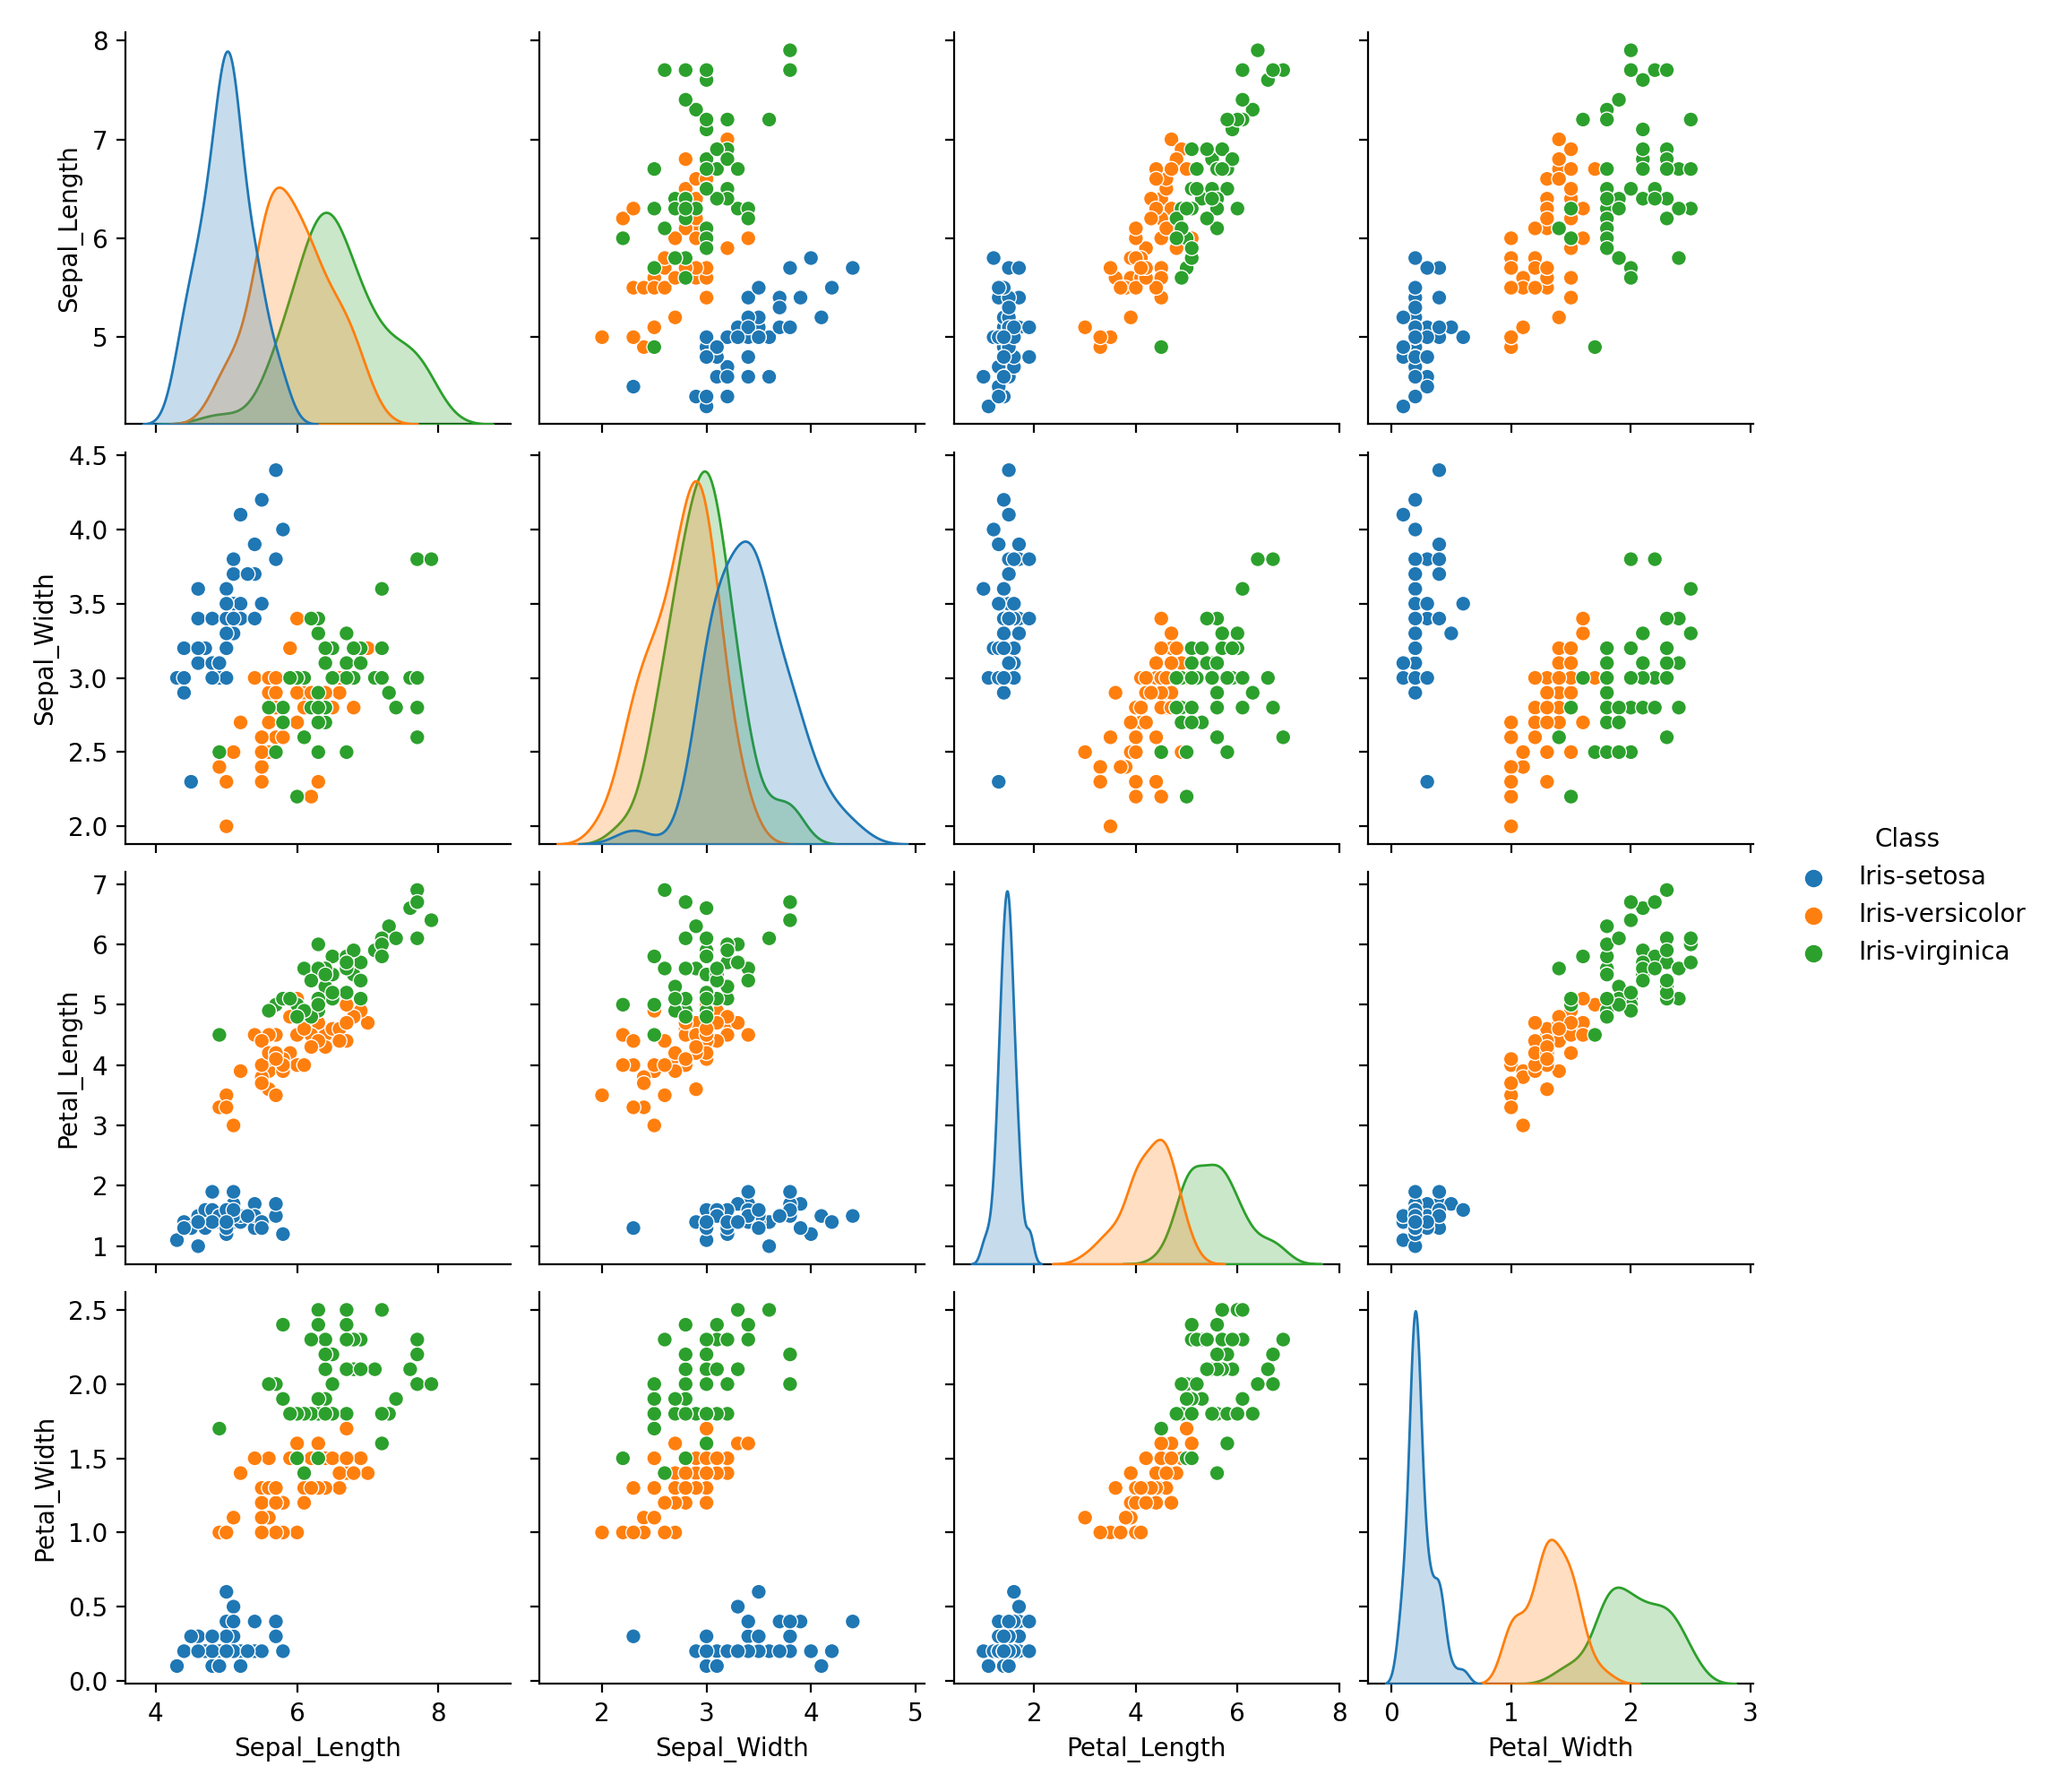

In [52]:
sns.pairplot(iris_data, hue='Class')

Scatter plots were created for each pair of variables (Sepal Length vs Sepal Width and Petal Length vs Petal Width).
Scatter plots show the relationship between two variables, which allow viewers to easily identify any trends.

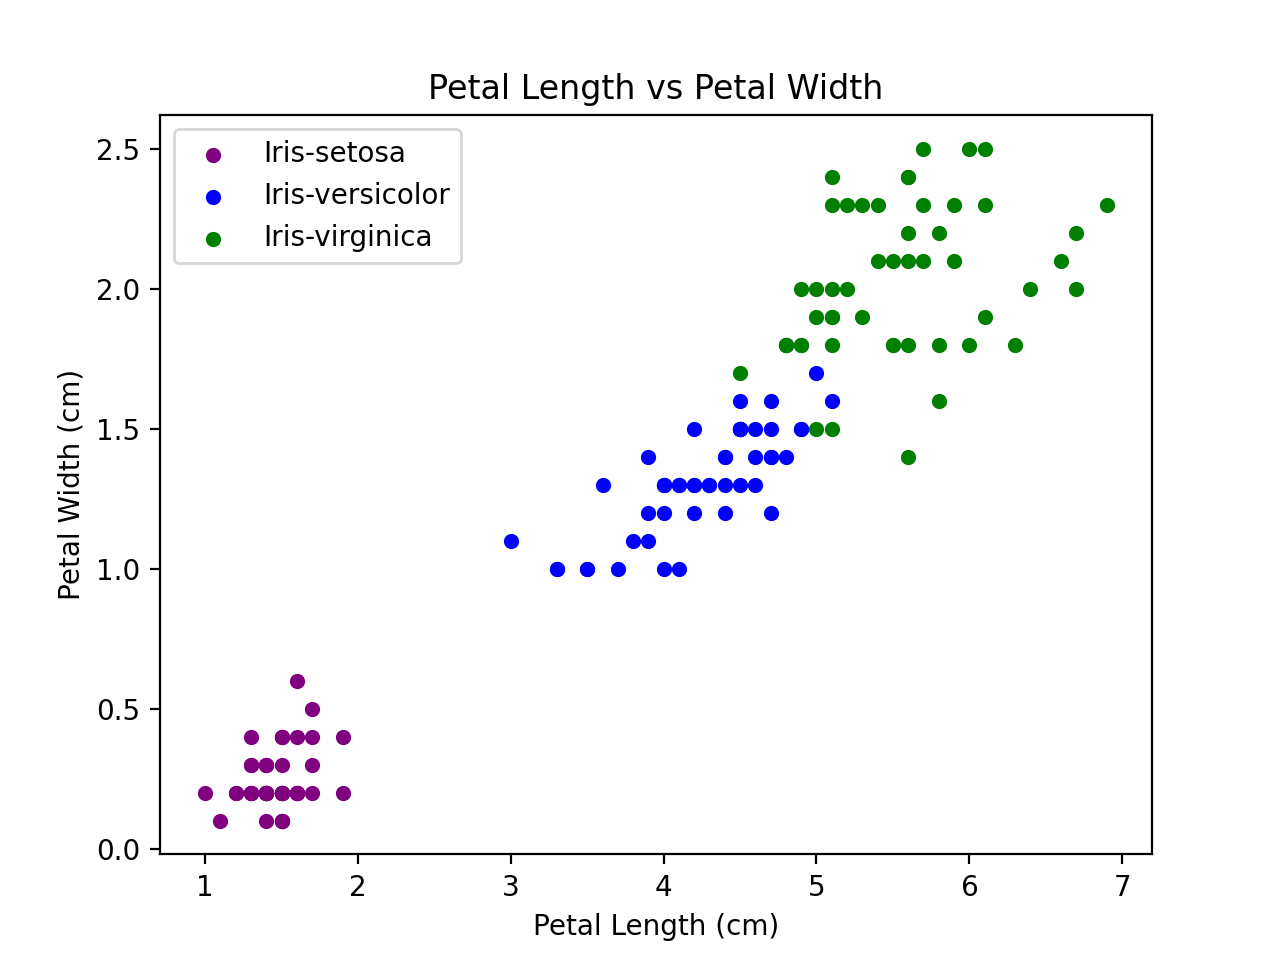

In [53]:
fig, ax = plt.subplots()
colors = {'Iris-setosa': 'purple', 'Iris-versicolor': 'blue' , 
            'Iris-virginica': 'green'}

grouped = iris_data.groupby('Class')
for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='Petal_Length', y='Petal_Width', label=key, color=colors[key])

plt.title("Petal Length vs Petal Width")
plt.legend()
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

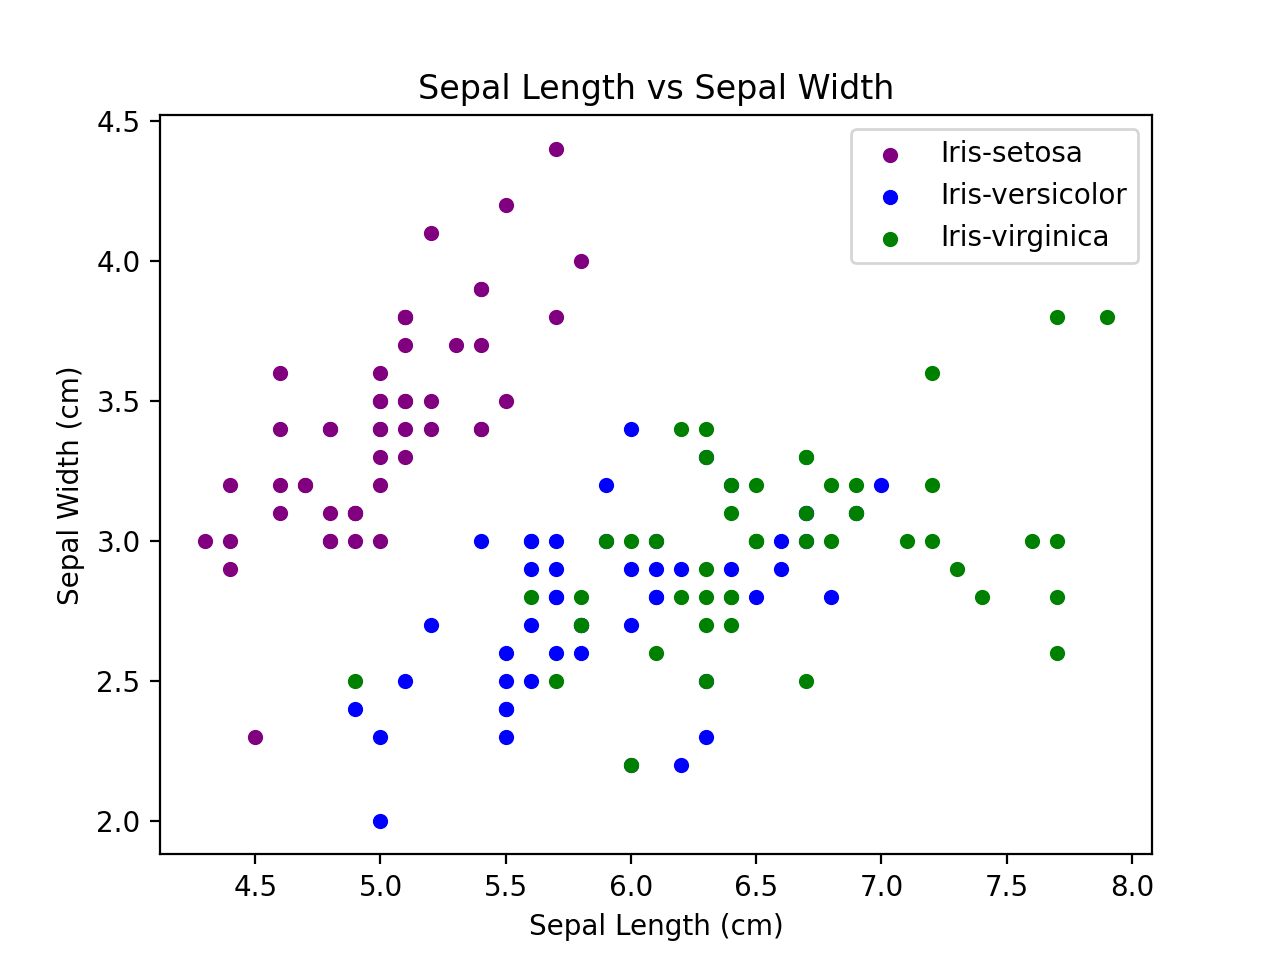

In [54]:
fig, ax = plt.subplots()
colors = {'Iris-setosa': 'purple', 'Iris-versicolor': 'blue' , 
            'Iris-virginica': 'green'}

grouped = iris_data.groupby('Class')
for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='Sepal_Length', y='Sepal_Width', label=key, color=colors[key])

plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [55]:

fig = px.scatter_3d(iris_data,  x='Sepal_Length', y='Sepal_Width', z='Petal_Width',color='Class')
fig.show()

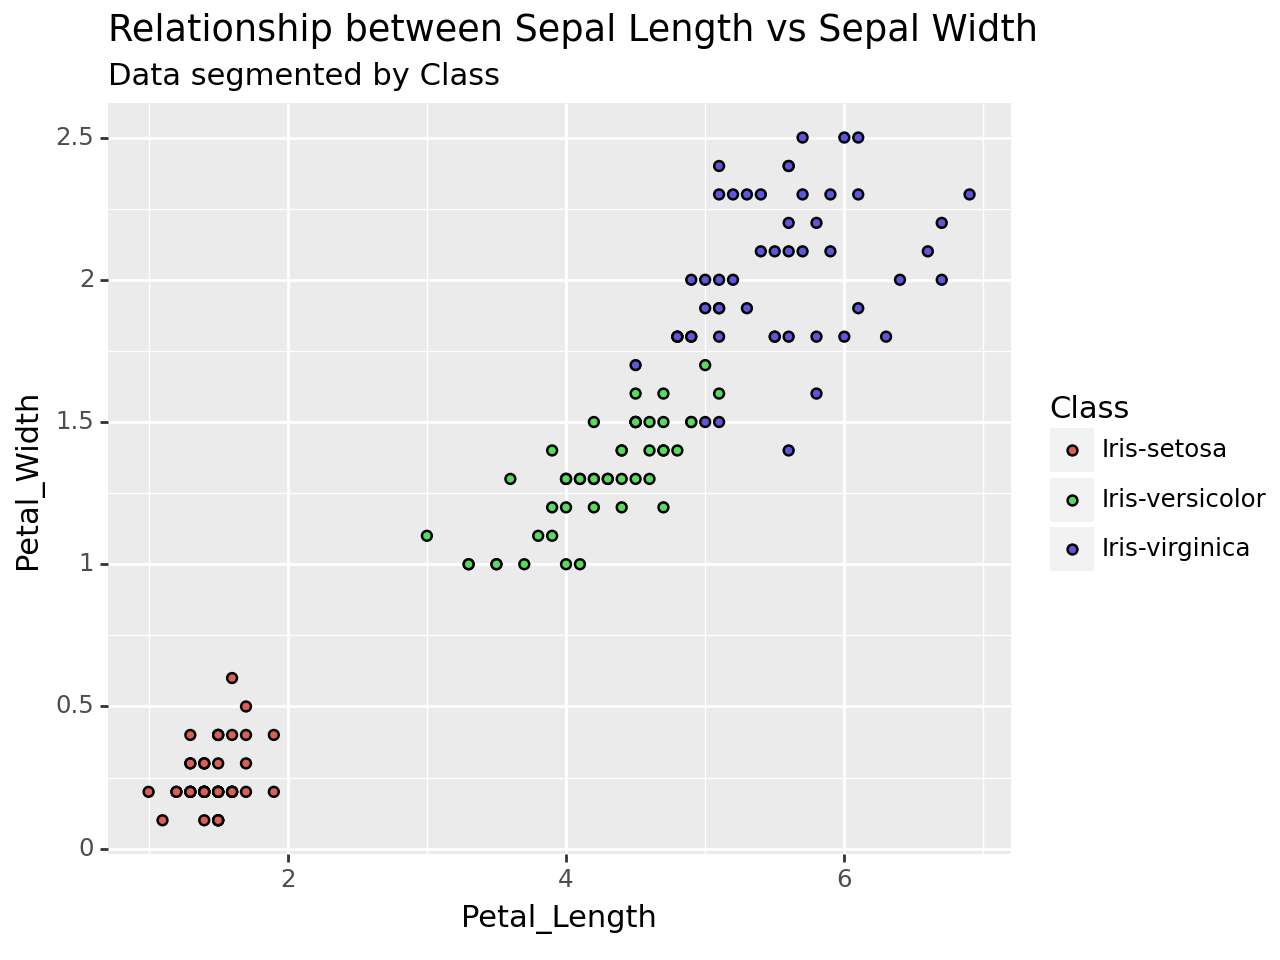

<Figure Size: (640 x 480)>

In [56]:
(ggplot(data = iris_data) + aes(x = "Petal_Length", y = "Petal_Width", fill="Class") + geom_point() + labs(title = "Relationship between Sepal Length vs Sepal Width",
subtitle ="Data segmented by Class"))

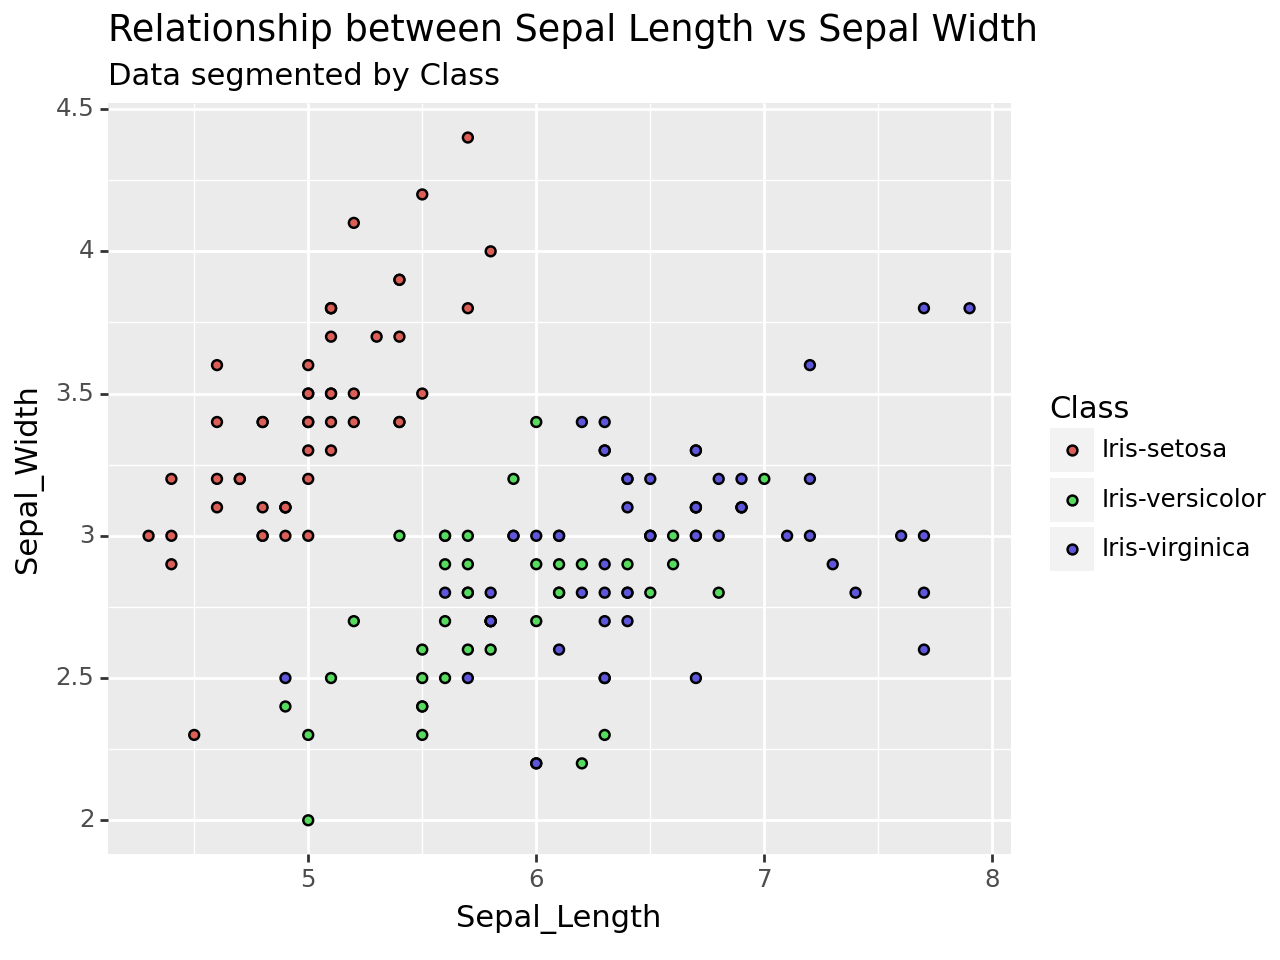

<Figure Size: (640 x 480)>

In [57]:
(ggplot(data = iris_data) + aes(x = "Sepal_Length", y = "Sepal_Width", fill="Class") + geom_point() + labs(title = "Relationship between Sepal Length vs Sepal Width",
subtitle ="Data segmented by Class"))

c:\Users\keith\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning:

Confidence intervals are not yet implemented for lowess smoothings.

c:\Users\keith\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning:

Confidence intervals are not yet implemented for lowess smoothings.

c:\Users\keith\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning:

Confidence intervals are not yet implemented for lowess smoothings.



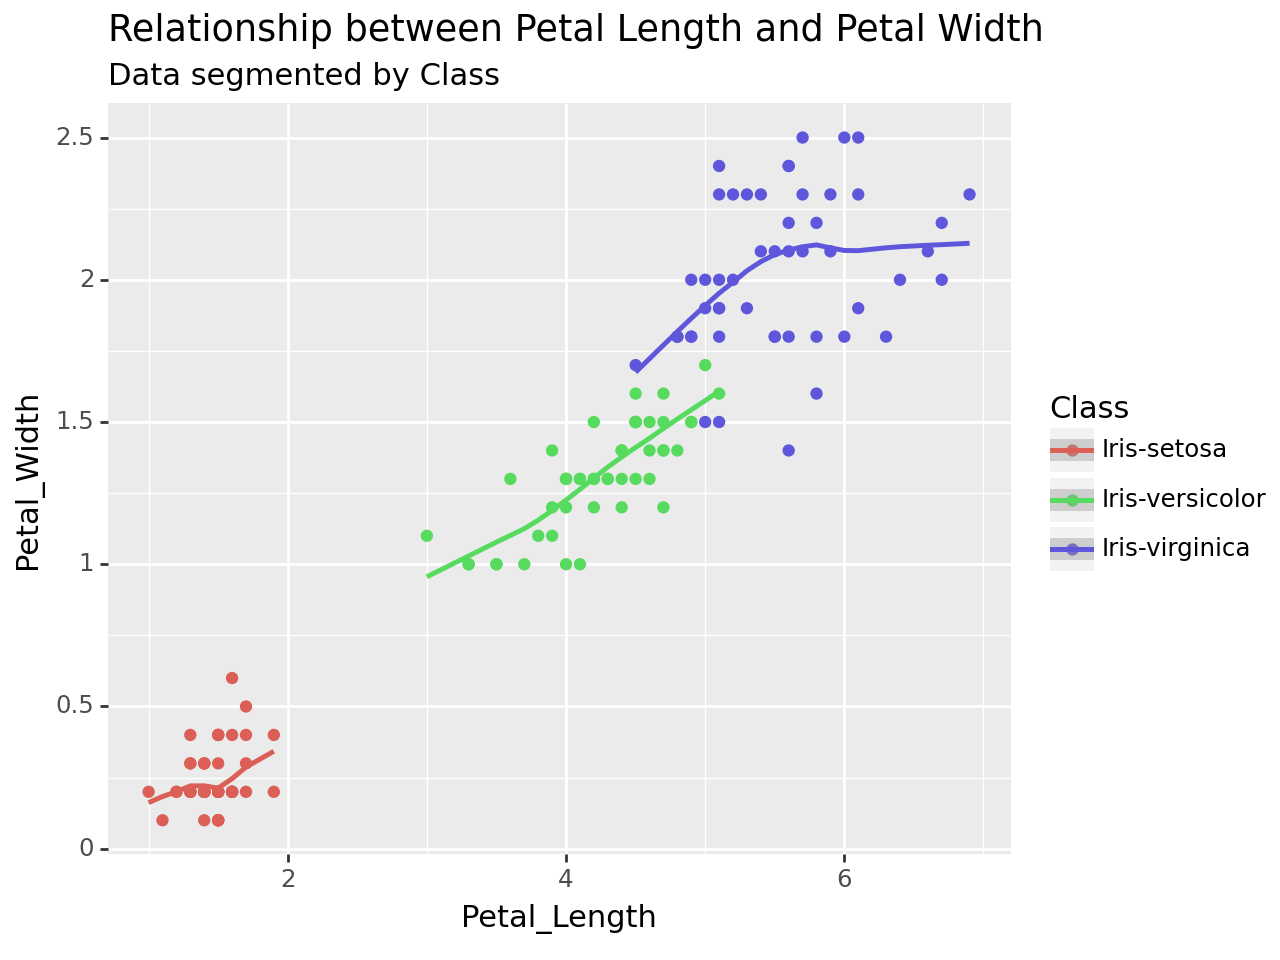

<Figure Size: (640 x 480)>

In [58]:
(ggplot(data = iris_data)+

geom_point(mapping = aes(x="Petal_Length", y = "Petal_Width", colour="Class"))+

geom_smooth(mapping = aes(x="Petal_Length", y = "Petal_Width", colour="Class"))+

labs(title = "Relationship between Petal Length and Petal Width",

subtitle ="Data segmented by Class"))

From the scatter plots above, it is clear the Setosa species is independent and lineary separable from the other two species, Versicolor and Virginica.

Comparing the two petal variables, there is a clear positive correlation between petal length and petal width - in that the flowers with the smallest petal lengths have the smallest petal widths and vice versa. The opposite is true for the sepal variables. Although not as strong a correlation, there is a slight negative correlation between sepal lengths and sepal widths.

# Swarm Plots
Swarm plots are useful for visualising the distribution of the variable. This particular plot uses an algorithm that prevents the data from overlapping, thus giving a better representation of the distribution of the data.

I plotted the data for sepal width on a swarm plot. The plot below indicated that the Iris-versicolor class has the smallest sepal widths, while the Iris-setosa class has the largest sepal widths.

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



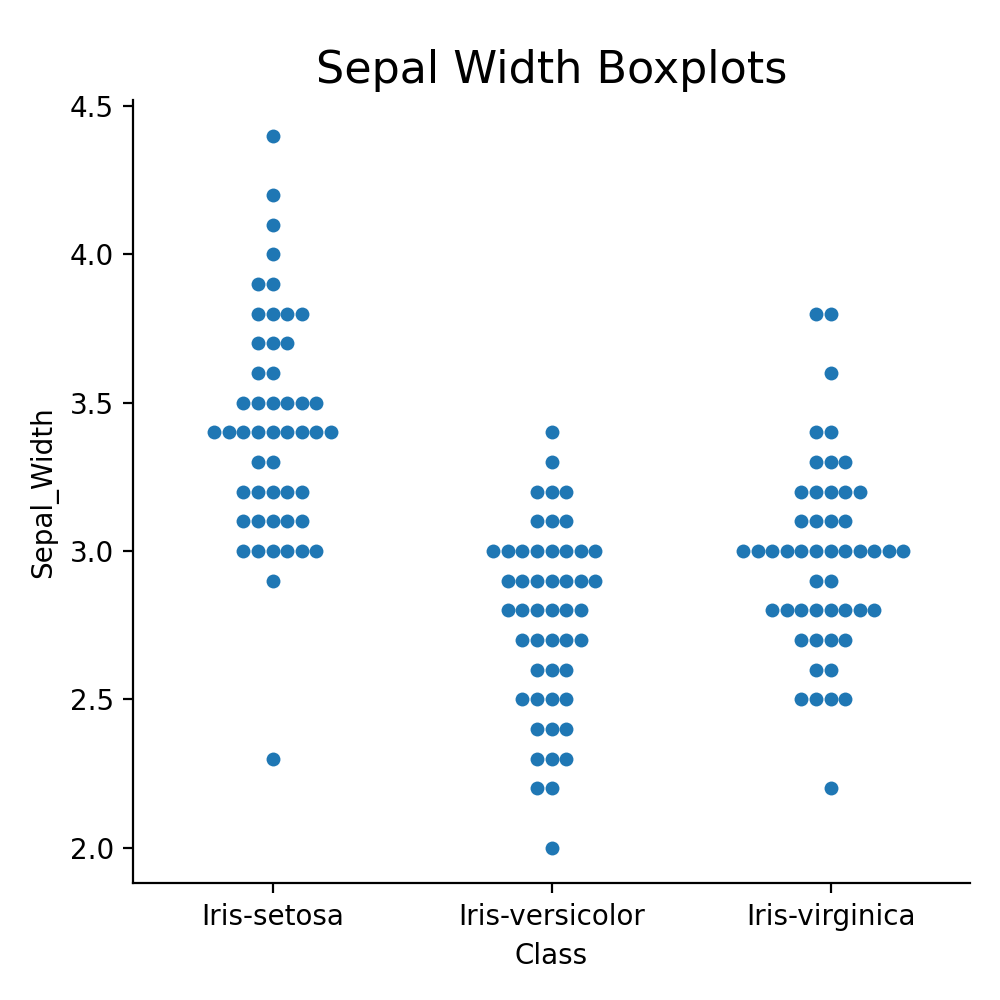

In [59]:
z = sns.catplot(data=iris_data, x="Class", y="Sepal_Width", kind="swarm")
plt.title('Sepal Width Boxplots', fontsize=16)
z.fig.subplots_adjust(top=.90)

In [60]:
iris_data.groupby('Class').agg(['mean', 'median'])

Sepal_Length        Sepal_Width        Petal_Length         \
                        mean median        mean median         mean median   
Class                                                                        
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                Petal_Width         
                       mean median  
Class                               
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

# Andrews curves

Andrews curves, also known as Andrews plot, are a visualization technique used to identify underlying structure in multidimensional data. Similar to principal component analysis and T-distributed stochastic neighbor embedding, Andrews curves reduce multiple features into low dimensional space to display relationships with target variables or classifications.

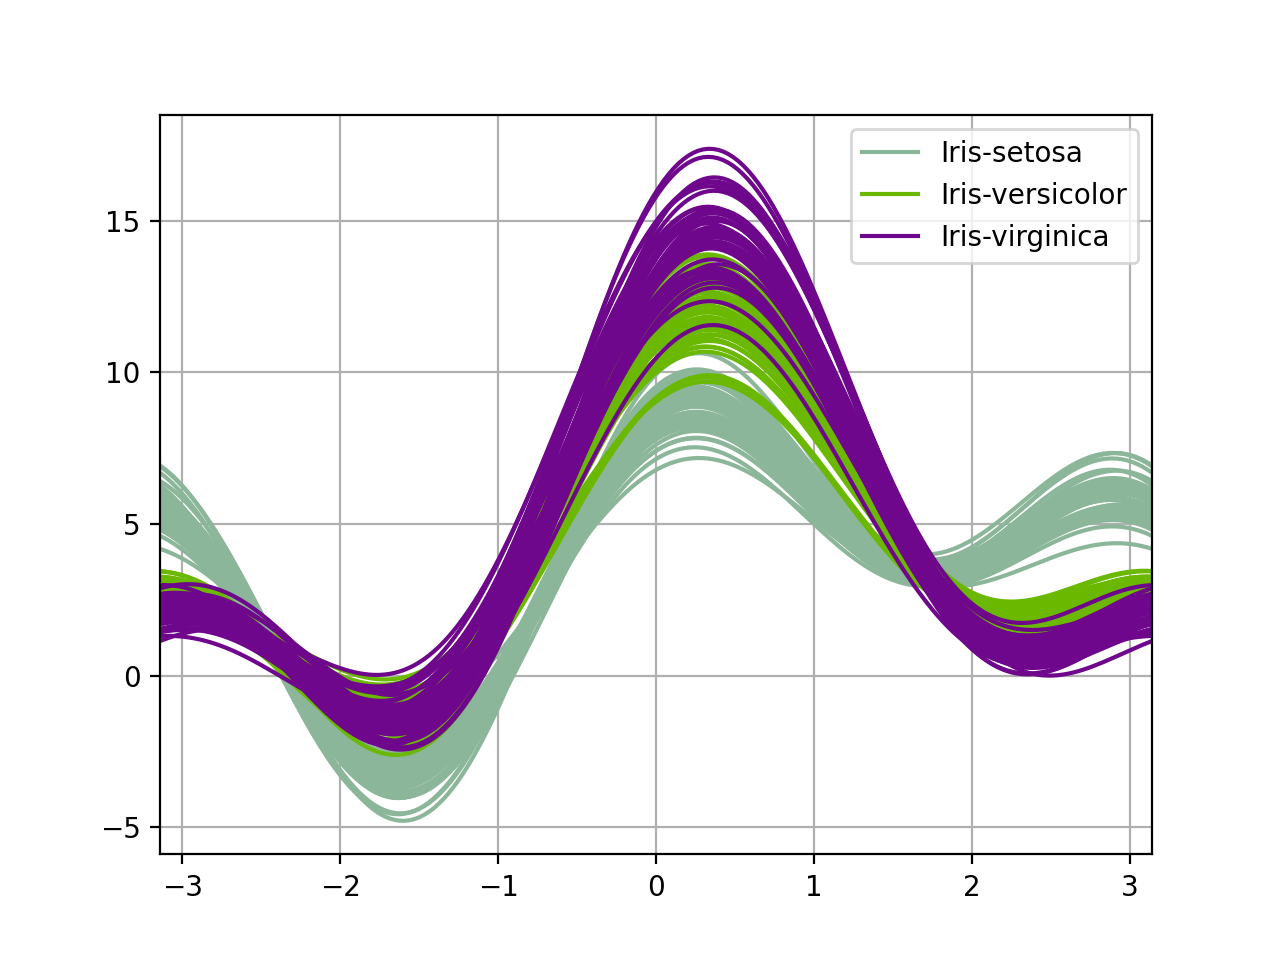

In [61]:
x = pd.plotting.andrews_curves(iris_data, 'Class')
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

# correlation and heatmaps

A correlation matrix is a table that shows the correlation coefficients between a set of variables. Correlation matrices are used to determine which pairs of variables are most closely related. They can also be used to identify relationships between variables that may not be readily apparent. Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship. Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships.

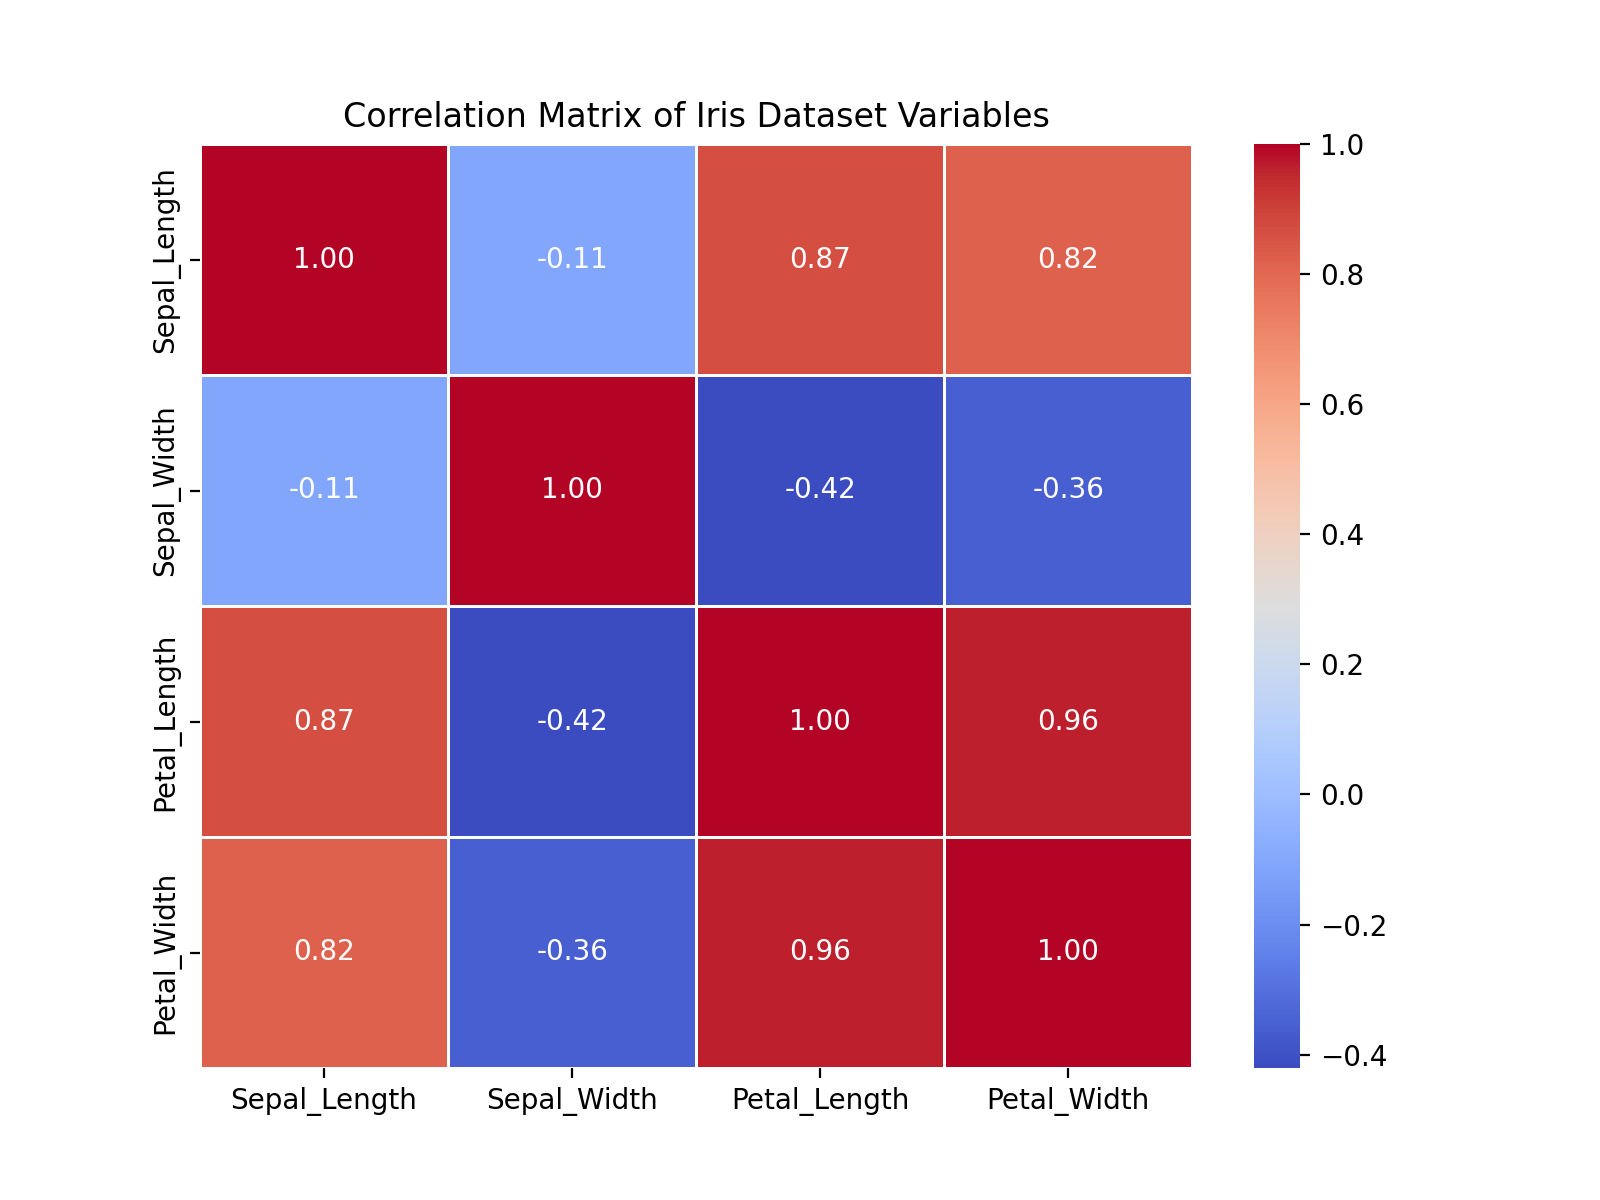

In [62]:
correlation_matrix = iris_data.drop('Class', axis=1).corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset Variables')
plt.show()

The above correlation matrix represents the correlation coefficients between different variables for the entire dataset.

Sepal length has a strong positive correlation with both petal length (0.872) and petal width (0.818). These values indicate a tendency for sepal length to increase as petal length and width increase.

Sepal width shows weak negative correlations with petal length (-0.428) and petal width (-0.366). This implies that as sepal width increases, there's a tendency for petal length and width to decrease slightly.

Petal length exhibits a strong positive correlation with petal width (0.963). This suggests that as petal length increases, there's a strong tendency for petal width to increase as well.

If we do correlation matrices for each species independently, it will be much more meaningful in the context of each species.

Correlation matrix for Iris-setosa Class:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.109369      0.871754     0.817954
Sepal_Width      -0.109369     1.000000     -0.420516    -0.356544
Petal_Length      0.871754    -0.420516      1.000000     0.962757
Petal_Width       0.817954    -0.356544      0.962757     1.000000


Correlation matrix for Iris-versicolor Class:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.109369      0.871754     0.817954
Sepal_Width      -0.109369     1.000000     -0.420516    -0.356544
Petal_Length      0.871754    -0.420516      1.000000     0.962757
Petal_Width       0.817954    -0.356544      0.962757     1.000000


Correlation matrix for Iris-virginica Class:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.109369      0.871754     0.817954
Sepal_Width      -0.109369     1.000000     -0.420516    -0

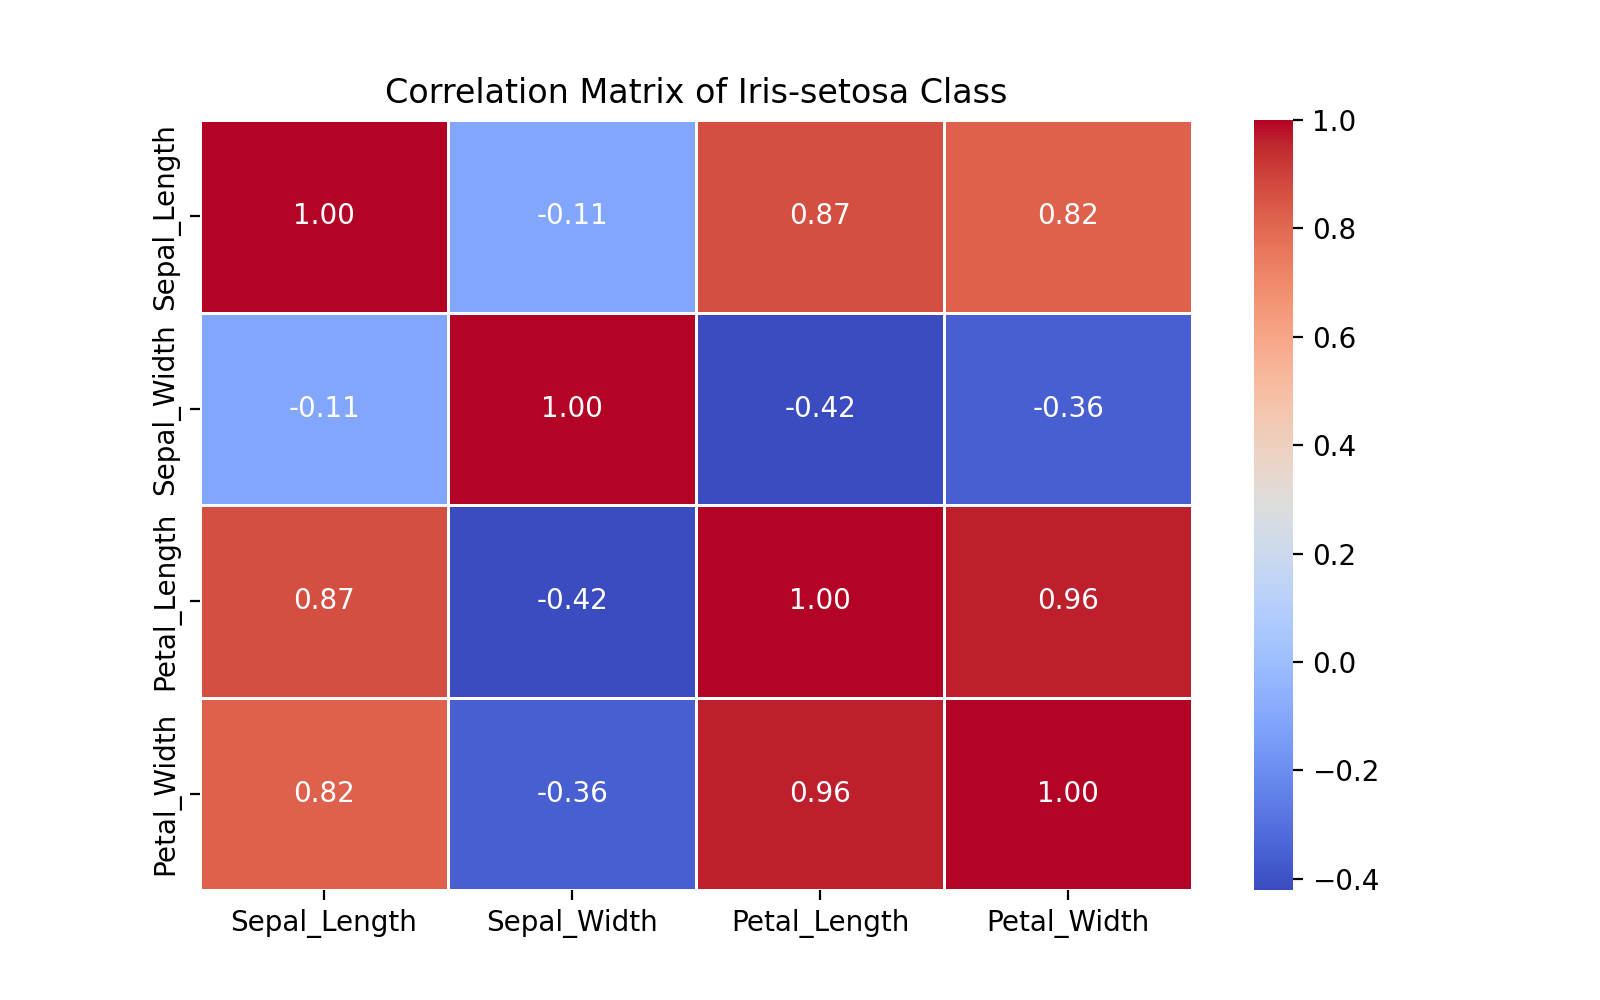

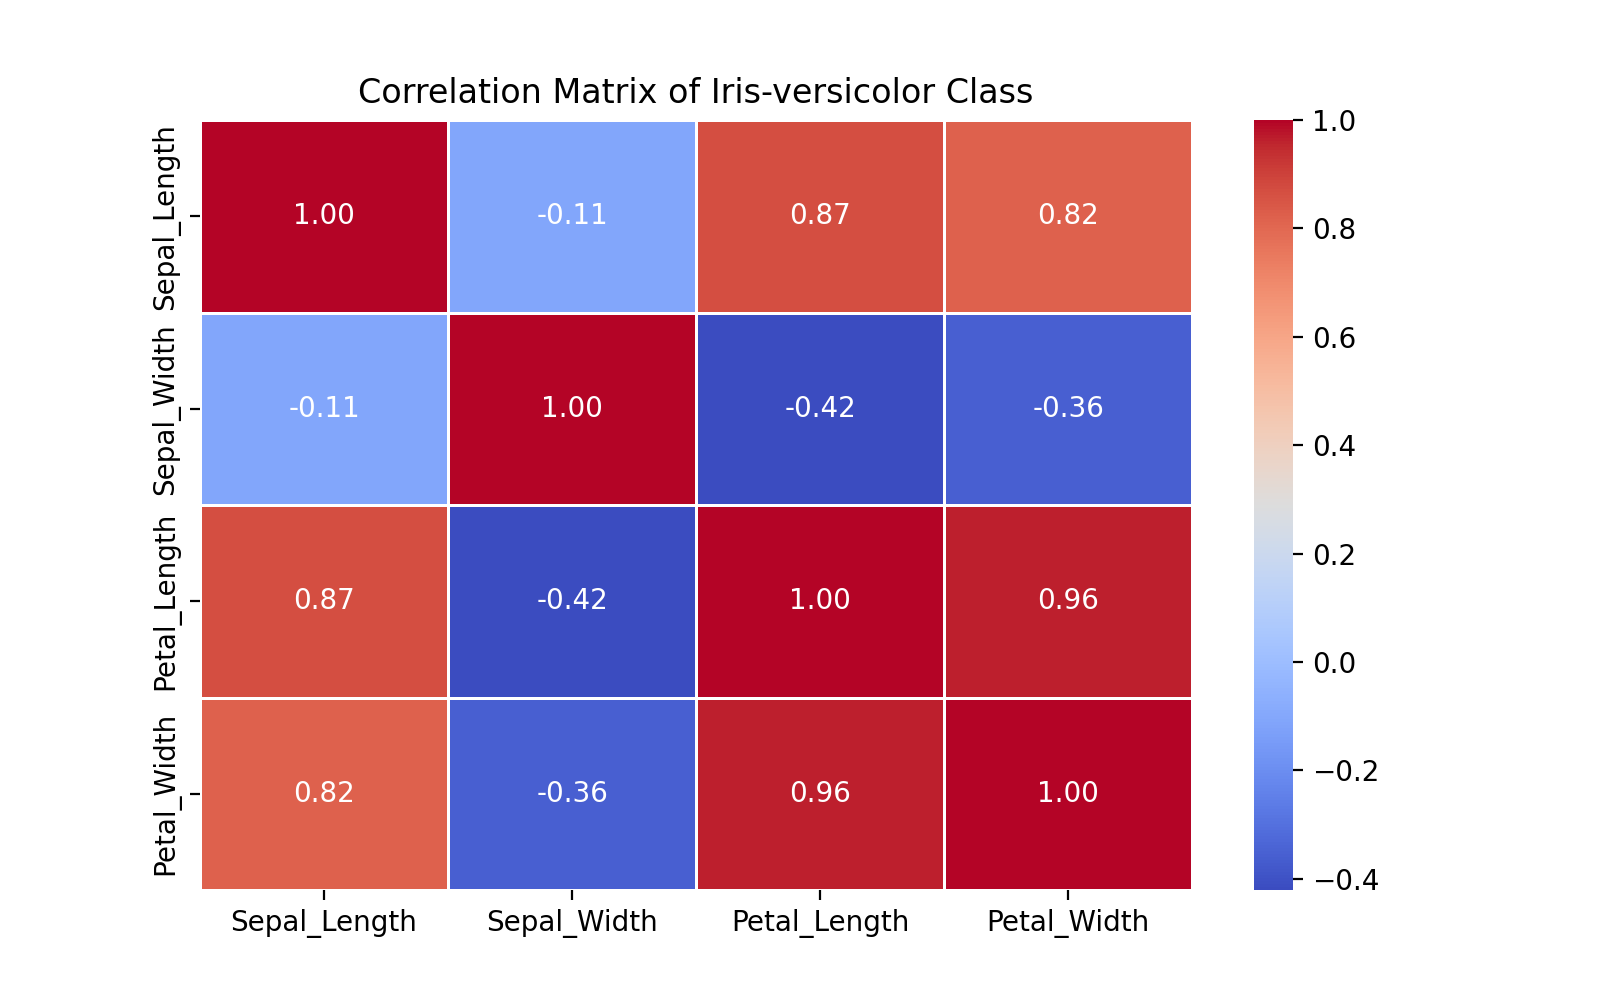

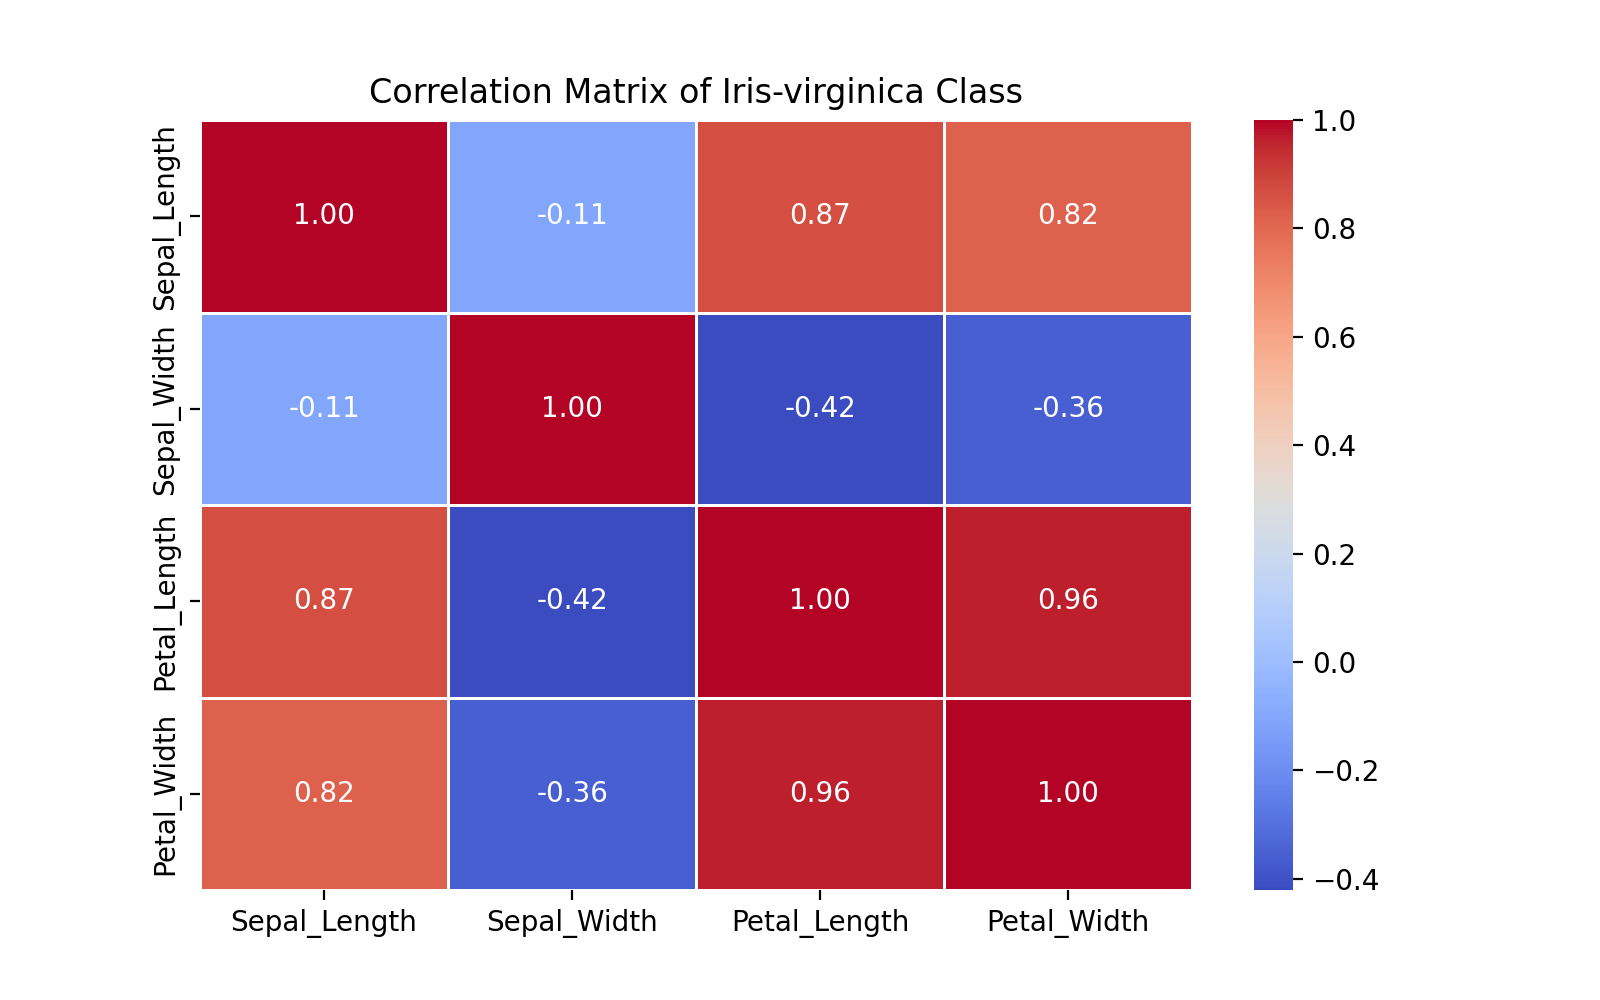

In [63]:
Class_list = iris_data['Class'].unique()

for Class in Class_list:
    species_data = iris_data[iris_data['Class'] == Class]
    correlation_matrix = iris_data.drop('Class', axis=1).corr()
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix of {Class} Class')
    print(f"Correlation matrix for {Class} Class:")
    print(correlation_matrix)
    print("\n")

Setosa
Sepal length exhibits a strong positive correlation with sepal width (0.743). This implies that as sepal length increases, there's a tendency for sepal width to increase as well.
Petal length has a relatively weak positive correlation with petal width (0.332), suggesting a moderate relationship between these two variables in the setosa species.
Sepal length has a very weak positive correlation with petal length (0.267) and petal width (0.278), suggesting little relationship between them.
Versicolor
Sepal length has a moderately strong positive correlation with petal length (0.754) and a moderate positive correlation with petal width (0.546). This indicates that as sepal length increases, petal length and width also tend to increase, although not as strongly.

Sepal width shows a moderate positive correlation with petal width (0.664) and a moderate correlation with petal length (0.561). As sepal width increases, there is a tendency for petal width and length to increase, but the relationship is not as strong as with sepal length.

Petal length demonstrates a strong positive correlation with petal width (0.787), indicating that as petal length increases, petal width also tends to increase significantly.

Virginica
Sepal length exhibits a strong positive correlation with petal length (0.864) and a weak correlation with sepal width (0.457). This suggests that as sepal length increases, there's a tendency for petal length to increase considerably, while the relationship with sepal width is less pronounced.

Sepal width has a moderate positive correlation with petal width (0.538) and a weak correlation with petal length (0.401). As sepal width increases, there's a tendency for petal width to increase moderately, but the correlation with petal length is not as strong.

Petal length demonstrates a strong positive correlation with sepal length (0.864) and a moderate positive correlation with sepal width (0.401). This indicates that as petal length increases, sepal length and width tend to increase, although the correlation with sepal width is not as strong.

Petal width has a weak correlation with sepal length (0.281) and sepal width (0.538), and a very weak correlation with petal length (0.322). This suggests a less pronounced relationship between petal width and sepal characteristics compared to the relationship between petal length and sepal characteristics.

# Kolmogorov-Smirnov test
In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). It is named after Andrey Kolmogorov and Nikolai Smirnov.

In [64]:
import warnings
import scipy.stats as st
def get_best_distribution(iris_data):
    dist_names = ["norm", 
                  "exponweib",
                  "pareto", 
                  "weibull_max", 
                  "weibull_min",
                  "skewnorm",
                  "norminvgauss",
                  "powernorm",
                  "uniform"]
    
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(iris_data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(iris_data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print(" ")
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

In [65]:
get_best_distribution(iris_data['Sepal_Length'])

p value for norm = 0.17058360931631134


p value for exponweib = 0.6126031950328066
p value for pareto = 9.751273391034225e-07
p value for weibull_max = 0.19231417373977677
p value for weibull_min = 0.33031060008714297
p value for skewnorm = 0.27425394855160246
p value for norminvgauss = 0.22739840681075496
p value for powernorm = 0.4693994569616412
p value for uniform = 9.80536604589249e-06
 
Best fitting distribution: exponweib
Best p value: 0.6126031950328066
Parameters for the best fit: (0.4337242019690208, 3.3623227023842674, 4.277000529224933, 2.3706075854333646)


In [66]:
get_best_distribution(iris_data['Sepal_Width'])

p value for norm = 0.07694369991172811


p value for exponweib = 0.15743506859729794
p value for pareto = 1.2473465137660868e-14
p value for weibull_max = 0.00439117946246409
p value for weibull_min = 0.1880294244094366
p value for skewnorm = 0.1564693229971612
p value for norminvgauss = 0.16378569787000874
p value for powernorm = 0.18163615832125823
p value for uniform = 3.3500975388397754e-09
 
Best fitting distribution: weibull_min
Best p value: 0.1880294244094366
Parameters for the best fit: (2.923672048906546, 1.8751849703424837, 1.3197012033829534)


In [67]:
get_best_distribution(iris_data['Petal_Width'])

p value for norm = 0.00021077837225543208


c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:2008: RuntimeWarning:

invalid value encountered in add



p value for exponweib = 3.896787003655591e-09
p value for pareto = 1.2858439257225887e-07
p value for weibull_max = 0.0003562864559913083
p value for weibull_min = 6.004195020761946e-07
p value for skewnorm = 0.00020933846509450145
p value for norminvgauss = 0.0003295380559815817
p value for powernorm = 0.00012112431230936792
p value for uniform = 1.7967618271180075e-05
 
Best fitting distribution: weibull_max
Best p value: 0.0003562864559913083
Parameters for the best fit: (2.0375096450719985, 2.6761524773697083, 1.6677184425077458)


In [68]:
get_best_distribution(iris_data['Petal_Length'])

p value for norm = 1.0900352050591725e-05
p value for exponweib = 1.9961069503405117e-05
p value for pareto = 1.0534664933534886e-09
p value for weibull_max = 1.3227648233272568e-32
p value for weibull_min = 7.881511385064802e-06
p value for skewnorm = 4.1266461801422576e-05
p value for norminvgauss = 3.210508807003979e-05
p value for powernorm = 1.4345434771054866e-05
p value for uniform = 8.297565118231696e-06
 
Best fitting distribution: skewnorm
Best p value: 4.1266461801422576e-05
Parameters for the best fit: (-5.107779132095215, 6.051839133386611, 2.889820194287351)


In [69]:
get_best_distribution(iris_data['Petal_Width'])

p value for norm = 0.00021077837225543208
p value for exponweib = 3.896787003655591e-09
p value for pareto = 1.2858439257225887e-07
p value for weibull_max = 0.0003562864559913083
p value for weibull_min = 6.004195020761946e-07
p value for skewnorm = 0.00020933846509450145
p value for norminvgauss = 0.0003295380559815817
p value for powernorm = 0.00012112431230936792
p value for uniform = 1.7967618271180075e-05
 
Best fitting distribution: weibull_max
Best p value: 0.0003562864559913083
Parameters for the best fit: (2.0375096450719985, 2.6761524773697083, 1.6677184425077458)


From  the above test we can see that sepal width,sepal length and petal width would best be suited a weibull disturbution. This indicates that they have a continuous probability distribution.  Weibull distribution is a unimodel and describes probabilities associated with continuous data. However, unlike the normal distribution, it can also model skewed data. In fact, its extreme flexibility allows it to model both left- and right-skewed data. The test also shows that petal length would be best suited to a normal skewed disturbution which would sugguest that it has a normal skewed disturbution. 

 # Simple Linear Regression
Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.


In [70]:
z = iris_data['Sepal_Length']

x = z.values.reshape(-1,1)
x.shape

(150, 1)

In [71]:
y = iris_data['Sepal_Width']
y.shape

(150,)

In [72]:
model = LinearRegression()
results = model.fit(x, y)
print('b0, y-intercept:', results.intercept_) # The y-intercept indicates the location where it cross an y axis
print('b1, slope:', results.coef_) # The slope indicates the steepness of a line

b0, y-intercept: 3.3886373794881
b1, slope: [-0.05726823]


In [73]:
R_sqr = results.score(x, y)
print (f'R square is equal: {R_sqr}')

R square is equal: 0.011961632834767588


In [74]:
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:            Sepal_Width   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.792
Date:                Sun, 07 Jan 2024   Prob (F-statistic):              0.183
Time:                        19:51:07   Log-Likelihood:                -86.090
No. Observations:                 150   AIC:                             176.2
Df Residuals:                     148   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3886      0.252     13.421      0.0

#  Conclusion 
The Aim of this notebook was to explore the famous Iris dataset, and to form an informative notebook that looked at information on each of the variables in this dataset by looking at summary statistics and explore various types of data visualisation with plots. The project focused on showcasing the use of data analysis and visualisation techniques while gaining meaningful insights from the Iris dataset revealing the characteristics of these flowers. This project also aims to shows my understanding of certain libraries and visualistion techniques. 

The project started by going through the origin of this dataset and it's relevance in modern day data science and machine learning. I then began to prepare the data using the pandas dataset and gave a breakdown of the summary statistics. This revealed general information about the data and provided insight regarding the distribution of species in the dataset. Some of the research found here showed that sepal Length has the largest variable in this dataset. It has a mean of 5.8.  It also showed Petal Width is the smallest variable in this dataset with a mean of 1.2 The analysis also showed that the Setosa species is linearly separable from the other two species, Virginica and Versicolor. This is clearly visible in the pair plots above.

After this I ran visualisation on the dataset using a wide range of graphs from scatter plots to pair plots to KDE plots. Again this was to look at the various disturbutions and relationships between the variables in this dataset. These were created using matplot lib and also using seaborn and helps to provide insight into the dataset. 

The next step of this project was to run some correlation. Correlation matrix uncovers notable associations between variables. Strong positive correlations exist between Sepal Length and Petal Length/Width, while Sepal Width shows weak negative correlations with Petal Length/Width. Species-specific correlation matrices uncover unique relationships for each Iris species.

The final step of the project looked at finding the possible best disturbution for each variable and running some basic linear regression along with a r test. this forms some extras that I feel could be explored further. 

# References 
1. Box plot and histogram exploration on Iris Data (2019) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/ (Accessed: 10 October 2023). 
2. Bozkus, E. (2022) Exploring the Iris Flower Dataset, Medium. Available at: https://eminebozkus.medium.com/exploring-the-iris-flower-dataset-4e000bcc266c (Accessed: 15 October 2023). 
3. Britton, J. (2020) Classification basics: Walk-through with the Iris Data Set, Medium. Available at: https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82 (Accessed: 10 October 2023). 
4. Brownlee, J. (2019) A gentle introduction to normality tests in Python, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/ (Accessed: 30 November 2023). 
5. Cui, Y. (2020) The iris dataset - A little bit of history and biology, Medium. Available at: https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5 (Accessed: 08 October 2023). 
6. Exploratory Data Analysis on Iris dataset (2022) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/ (Accessed: 12 October 2023). 
7. Frost, J. (2023) How to interpret R-squared in regression analysis, Statistics By Jim. Available at: https://statisticsbyjim.com/regression/interpret-r-squared-regression/ (Accessed: 21 November 2023). 
8. How to display the value on horizontal bars (2019) Stack Overflow. Available at: https://stackoverflow.com/questions/30228069/how-to-display-the-value-on-horizontal-bars/53452793#53452793 (Accessed: 20 November 2023). 
9. Iris (no date) UCI Machine Learning Repository. Available at: https://archive.ics.uci.edu/dataset/53/iris (Accessed: 10 October 2023). 
10. Naidubhavya (2020) Detailed explanation of exploratory data analysis using Iris dataset, Medium. Available at: https://medium.com/@naidubhavya06/detailed-explanation-of-exploratory-data-analysis-using-iris-dataset-fa8082a4ce0f (Accessed: 18 October 2023). 
11. (2019) How to find probability distribution and parameters for real data? (python 3), Stack Overflow. Available at: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 (Accessed: 18 November 2023). 
12. PyCoach, T. (2021) A python pandas introduction to Excel Users, Medium. Available at: https://towardsdatascience.com/a-python-pandas-introduction-to-excel-users-1696d65604f6 (Accessed: 16 October 2023). 
13. Python - basics of pandas using Iris dataset (2023) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/ (Accessed: 09 October 2023). 
14. Sharma, P. (2021) Exploratory data analysis : Iris dataset, Medium. Available at: https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda (Accessed: 08 October 2023). 
15. Szabo, B. (2020) How to create a Seaborn Correlation Heatmap in python?, Medium. Available at: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e (Accessed: 03 December 2023). 